In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os
from itertools import combinations

# Configurações de visualização
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# 📊 **FASE 2: COMPREENSÃO DOS DADOS (DATA UNDERSTANDING)**

## 🔍 **2.1 Coleta e Carregamento dos Dados**

### **Dataset: Pima Indians Diabetes Database**
- **Fonte**: National Institute of Diabetes and Digestive and Kidney Diseases
- **População**: Mulheres de herança Pima com pelo menos 21 anos
- **Contexto**: Estudo longitudinal sobre diabetes em população de alto risco
- **Aplicação**: Desenvolvimento de modelos preditivos para detecção precoce

In [56]:
# ===== CARREGAMENTO INICIAL DOS DADOS =====

# Carregar o dataset principal a partir de arquivo local
df = pd.read_csv('diabetes.csv')

print("\n" + "="*60)
print("📋 DADOS CARREGADOS COM SUCESSO")
print("="*60)
print(f"Dataset original: {df.shape[0]} linhas, {df.shape[1]} colunas")
print(f"\nPrimeira visão da distribuição da variável target:")
print(df['Outcome'].value_counts())
print(f"\nPercentual de balanceamento inicial:")
balanceamento = df['Outcome'].value_counts(normalize=True) * 100
print(f"Não-Diabetes: {balanceamento[0]:.1f}%")
print(f"Diabetes: {balanceamento[1]:.1f}%")
print(f"\n⚠️  Observação: Dataset desbalanceado - {balanceamento[0]:.1f}% vs {balanceamento[1]:.1f}%")
print("🔄 Será necessário tratamento de balanceamento")


📋 DADOS CARREGADOS COM SUCESSO
Dataset original: 768 linhas, 9 colunas

Primeira visão da distribuição da variável target:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentual de balanceamento inicial:
Não-Diabetes: 65.1%
Diabetes: 34.9%

⚠️  Observação: Dataset desbalanceado - 65.1% vs 34.9%
🔄 Será necessário tratamento de balanceamento


In [57]:
# Visualização das primeiras amostras
print("\n📋 PRIMEIRAS 5 AMOSTRAS")
print("=" * 50)
display(df.head())

print("\n📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 50)
display(df.describe())

print("\n🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET")
print("=" * 50)
target_dist = df['Outcome'].value_counts()
print(f"Não-diabéticos (0): {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
print(f"Diabéticos (1): {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")


📋 PRIMEIRAS 5 AMOSTRAS


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



📊 ESTATÍSTICAS DESCRITIVAS


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET
Não-diabéticos (0): 500 (65.1%)
Diabéticos (1): 268 (34.9%)


## 📈 **2.2 Análise Exploratória dos Dados**

### **Verificação de Qualidade dos Dados**
Análise detalhada para identificar:
- **Valores ausentes**: Verificação de dados faltantes
- **Valores zero anômalos**: Identificação de zeros biologicamente impossíveis
- **Distribuições das variáveis**: Análise estatística das features
- **Correlações**: Relacionamento entre variáveis preditoras

In [58]:
# ===== ANÁLISE EXPLORATÓRIA DETALHADA =====

print("\n" + "="*70)
print("🔍 ANÁLISE EXPLORATÓRIA DETALHADA DOS DADOS")
print("="*70)

# Informações básicas do dataset
print("\n📊 INFORMAÇÕES GERAIS:")
print(f"Shape: {df.shape}")
print(f"Tipos de dados:\n{df.dtypes}")
print(f"\nMemória utilizada: {df.memory_usage(deep=True).sum():,.0f} bytes")

# Estatísticas descritivas
print("\n📊 ESTATÍSTICAS DESCRITIVAS:")
print(df.describe().round(2))

# Verificar valores ausentes
print("\n🔍 VALORES AUSENTES:")
valores_ausentes = df.isnull().sum()
if valores_ausentes.sum() == 0:
    print("✅ Nenhum valor ausente encontrado")
else:
    print(valores_ausentes[valores_ausentes > 0])

# Verificar valores suspeitos (zeros em variáveis que não deveriam ser zero)
print("\n⚠️  VALORES SUSPEITOS (zeros em variáveis biológicas):")
vars_biologicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for var in vars_biologicas:
    zeros = (df[var] == 0).sum()
    if zeros > 0:
        print(f"{var}: {zeros} zeros ({zeros/len(df):.1%})")

# Distribuição da variável target
print("\n🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET:")
print(df['Outcome'].value_counts())
print("\nProporções:")
print(df['Outcome'].value_counts(normalize=True).round(3))

# Correlações básicas
print("\n🔗 CORRELAÇÕES COM A VARIÁVEL TARGET:")
correlacoes = df.corr()['Outcome'].abs().sort_values(ascending=False)
print(correlacoes[correlacoes.index != 'Outcome'].round(3))


🔍 ANÁLISE EXPLORATÓRIA DETALHADA DOS DADOS

📊 INFORMAÇÕES GERAIS:
Shape: (768, 9)
Tipos de dados:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Memória utilizada: 55,428 bytes

📊 ESTATÍSTICAS DESCRITIVAS:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00      

In [59]:
# ===== FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS =====

print("\n" + "="*70)
print("📊 FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS")
print("="*70)

# Separar features e target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"\n📋 Dimensões originais:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Classes no target: {y.unique()}")

# ETAPA 1: Separar 20% para teste (conjunto final de avaliação)
print(f"\n🔄 ETAPA 1: Separando conjunto de teste (20%)")
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# ETAPA 2: Dividir os 80% restantes em treino (60% total) e validação (20% total)
print(f"🔄 ETAPA 2: Separando treino e validação dos 80% restantes")
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.25,  # 25% de 80% = 20% do total
    random_state=42, 
    stratify=y_temp
)

print(f"\n📈 RESULTADO DA DIVISÃO:")
print("-"*50)
print(f"{'Conjunto':<12} {'Amostras':<10} {'% Total':<10} {'% Classe 0':<12} {'% Classe 1':<12}")
print("-"*50)

# Calcular estatísticas para cada conjunto
conjuntos = [
    ('Treino', X_train, y_train),
    ('Validação', X_val, y_val),
    ('Teste', X_test, y_test)
]

for nome, X_conj, y_conj in conjuntos:
    total_amostras = len(y_conj)
    perc_total = total_amostras / len(y) * 100
    classe_0 = (y_conj == 0).sum()
    classe_1 = (y_conj == 1).sum()
    perc_classe_0 = classe_0 / total_amostras * 100
    perc_classe_1 = classe_1 / total_amostras * 100
    
    print(f"{nome:<12} {total_amostras:<10} {perc_total:<10} {perc_classe_0:<12} {perc_classe_1:<12}")

print("-"*50)

# Verificar se a estratificação foi bem-sucedida
print(f"\n✅ VERIFICAÇÃO DA ESTRATIFICAÇÃO:")
original_ratio = y.mean()
print(f"Proporção original de diabetes: {original_ratio:.3f}")

for nome, _, y_conj in conjuntos:
    ratio = y_conj.mean()
    print(f"Proporção em {nome}: {ratio:.3f} (diferença: {abs(ratio - original_ratio):.3f})")

print(f"\n🎯 OBJETIVO ALCANÇADO: Todos os conjuntos mantêm proporções similares!")

# Salvar informações da divisão
divisao_info = {
    'treino_size': len(y_train),
    'val_size': len(y_val),
    'test_size': len(y_test),
    'original_ratio': original_ratio,
    'treino_ratio': y_train.mean(),
    'val_ratio': y_val.mean(),
    'test_ratio': y_test.mean()
}

print(f"\n💾 Informações da divisão salvas para referência futura.")


📊 FASE 3.1: DIVISÃO ESTRATIFICADA DOS DADOS

📋 Dimensões originais:
Features (X): (768, 8)
Target (y): (768,)
Classes no target: [1 0]

🔄 ETAPA 1: Separando conjunto de teste (20%)
🔄 ETAPA 2: Separando treino e validação dos 80% restantes

📈 RESULTADO DA DIVISÃO:
--------------------------------------------------
Conjunto     Amostras   % Total    % Classe 0   % Classe 1  
--------------------------------------------------
Treino       460        59.895833333333336 65.21739130434783 34.78260869565217
Validação    154        20.052083333333336 64.93506493506493 35.064935064935064
Teste        154        20.052083333333336 64.93506493506493 35.064935064935064
--------------------------------------------------

✅ VERIFICAÇÃO DA ESTRATIFICAÇÃO:
Proporção original de diabetes: 0.349
Proporção em Treino: 0.348 (diferença: 0.001)
Proporção em Validação: 0.351 (diferença: 0.002)
Proporção em Teste: 0.351 (diferença: 0.002)

🎯 OBJETIVO ALCANÇADO: Todos os conjuntos mantêm proporções similares!

### 🎯 **Fase 3.2: Tratamento de Outliers**

#### **📈 Método IQR (Interquartile Range)**

**Princípio**: Outliers são valores que estão:
- **Abaixo de Q1 - 1.5 × IQR**
- **Acima de Q3 + 1.5 × IQR**

Onde:
- **Q1**: Primeiro quartil (25º percentil)
- **Q3**: Terceiro quartil (75º percentil)
- **IQR**: Q3 - Q1 (Intervalo Interquartil)

#### **⚠️ Por que Aplicar APENAS no Treino?**

1. **Evitar Data Leakage**: Informações de validação/teste não podem influenciar o treino
2. **Simular Realidade**: Em produção, novos dados podem ter outliers
3. **Avaliação Honesta**: Performance em dados "reais" e não processados
4. **Robustez**: Modelo deve ser resistente a outliers em novos dados

---


📊 FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO DETALHADA

📈 RESULTADO GERAL DA REMOÇÃO DE OUTLIERS:
Amostras originais: 460
Amostras após limpeza: 427
Total de outliers removidos: 33
Percentual removido: 7.2%

📊 DETALHES POR FEATURE:
--------------------------------------------------------------------------------------------------------------
Feature                   Q1       Q3       IQR      Lower    Upper    Outliers  %     
--------------------------------------------------------------------------------------------------------------
Pregnancies               1.00     6.00     5.00     -11.50   18.50    0         0.0   
Glucose                   99.00    140.00   41.00    -3.50    242.50   0         0.0   
BloodPressure             62.00    80.00    18.00    17.00    125.00   18        3.9   
SkinThickness             0.00     33.00    33.00    -82.50   115.50   0         0.0   
Insulin                   0.00     130.00   130.00   -325.00  455.00   8         1.8   
BMI       

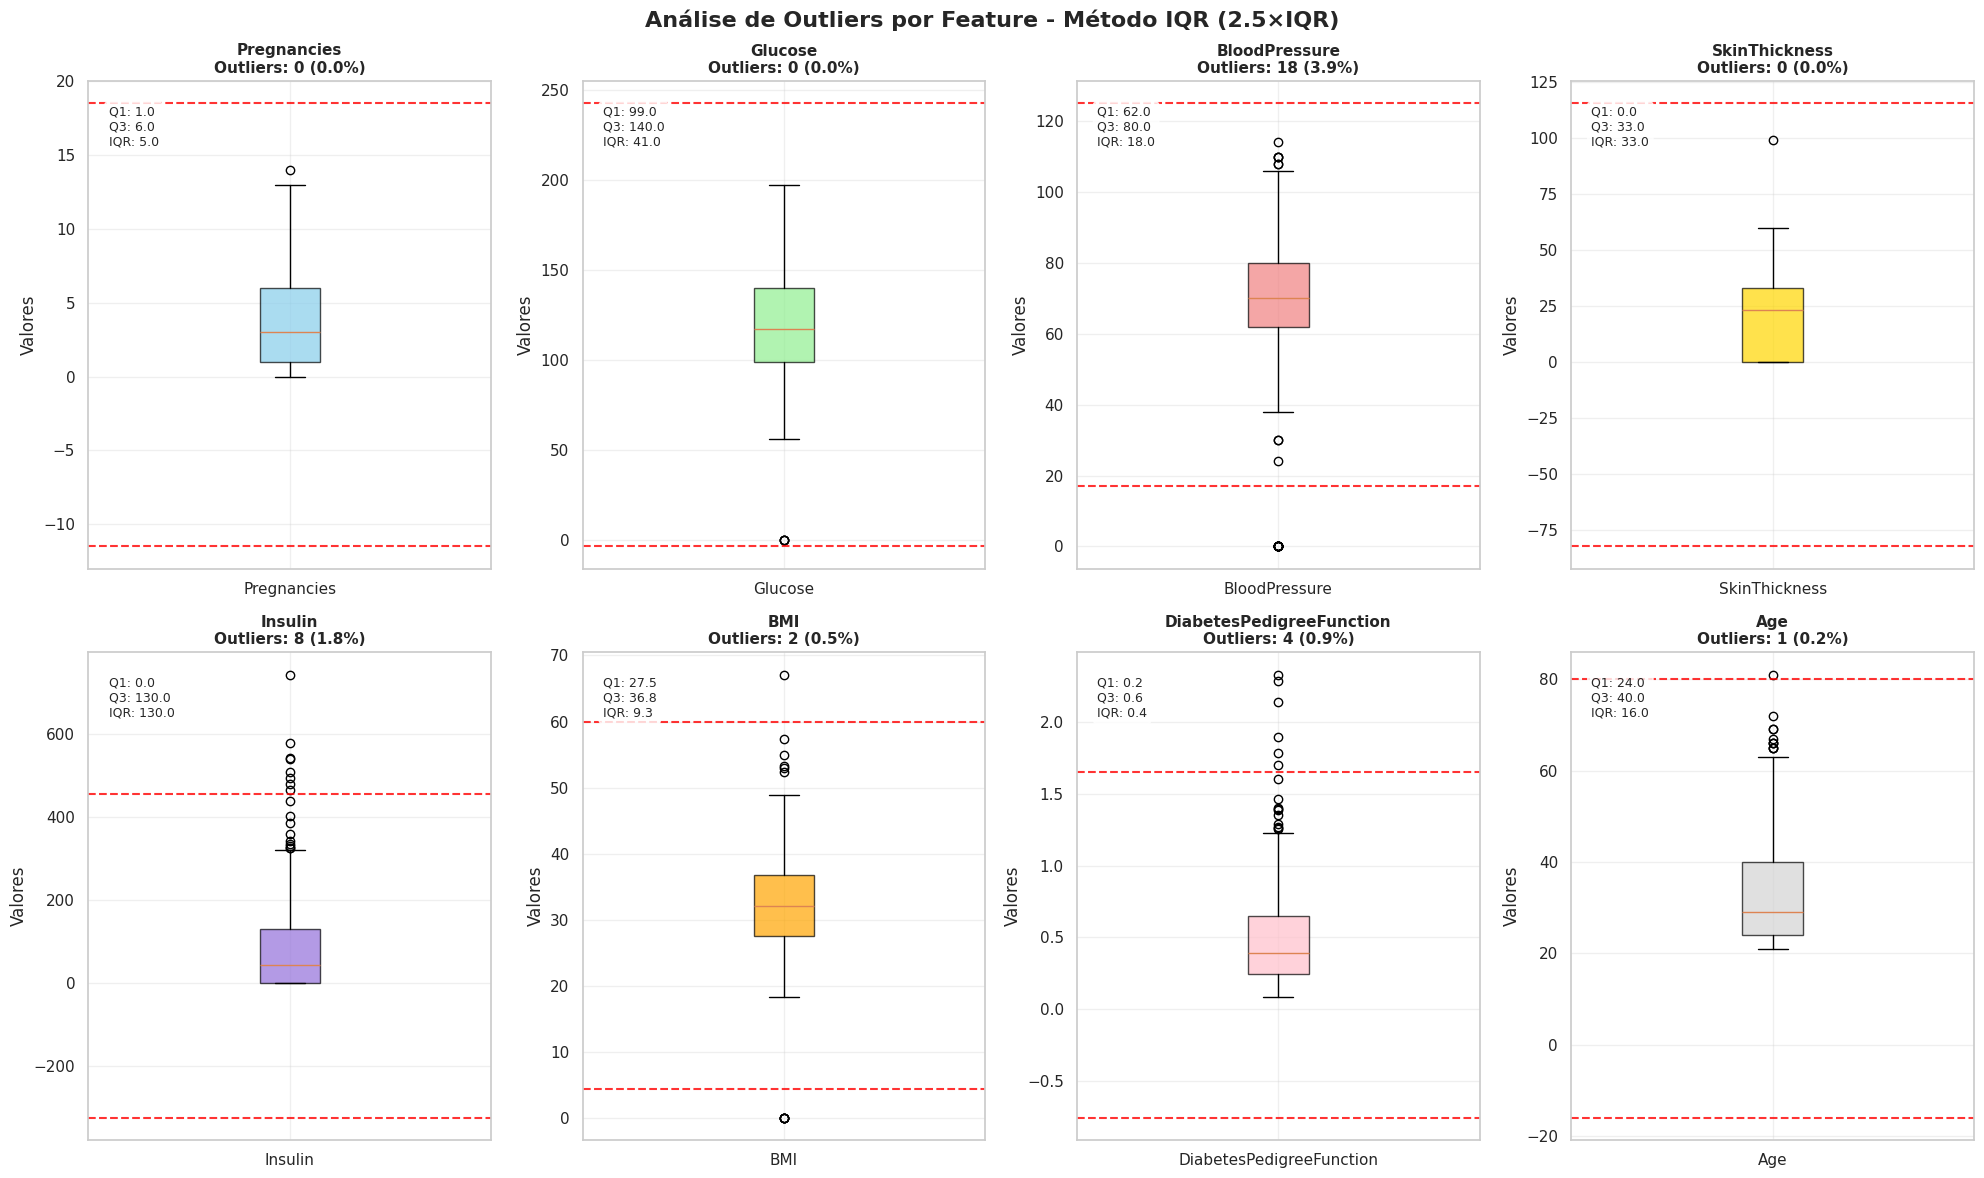

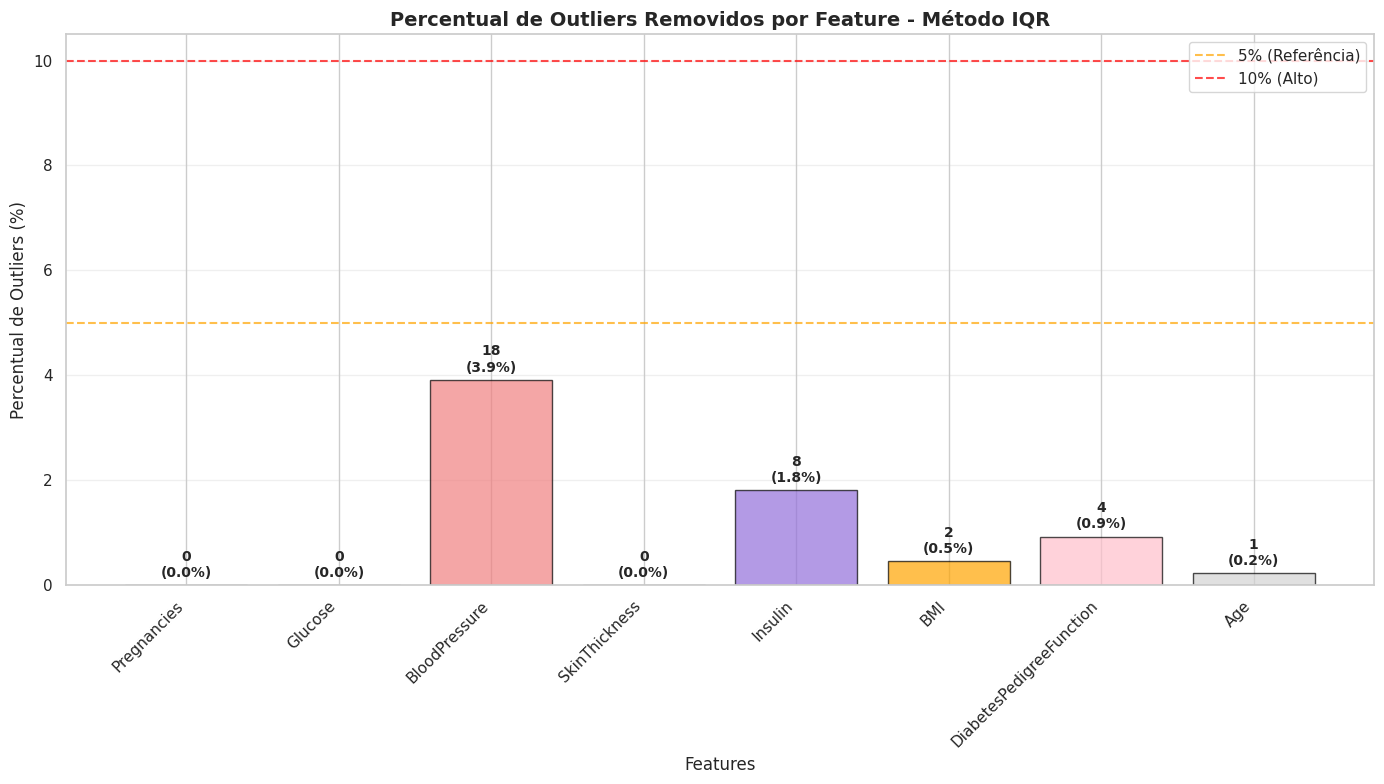

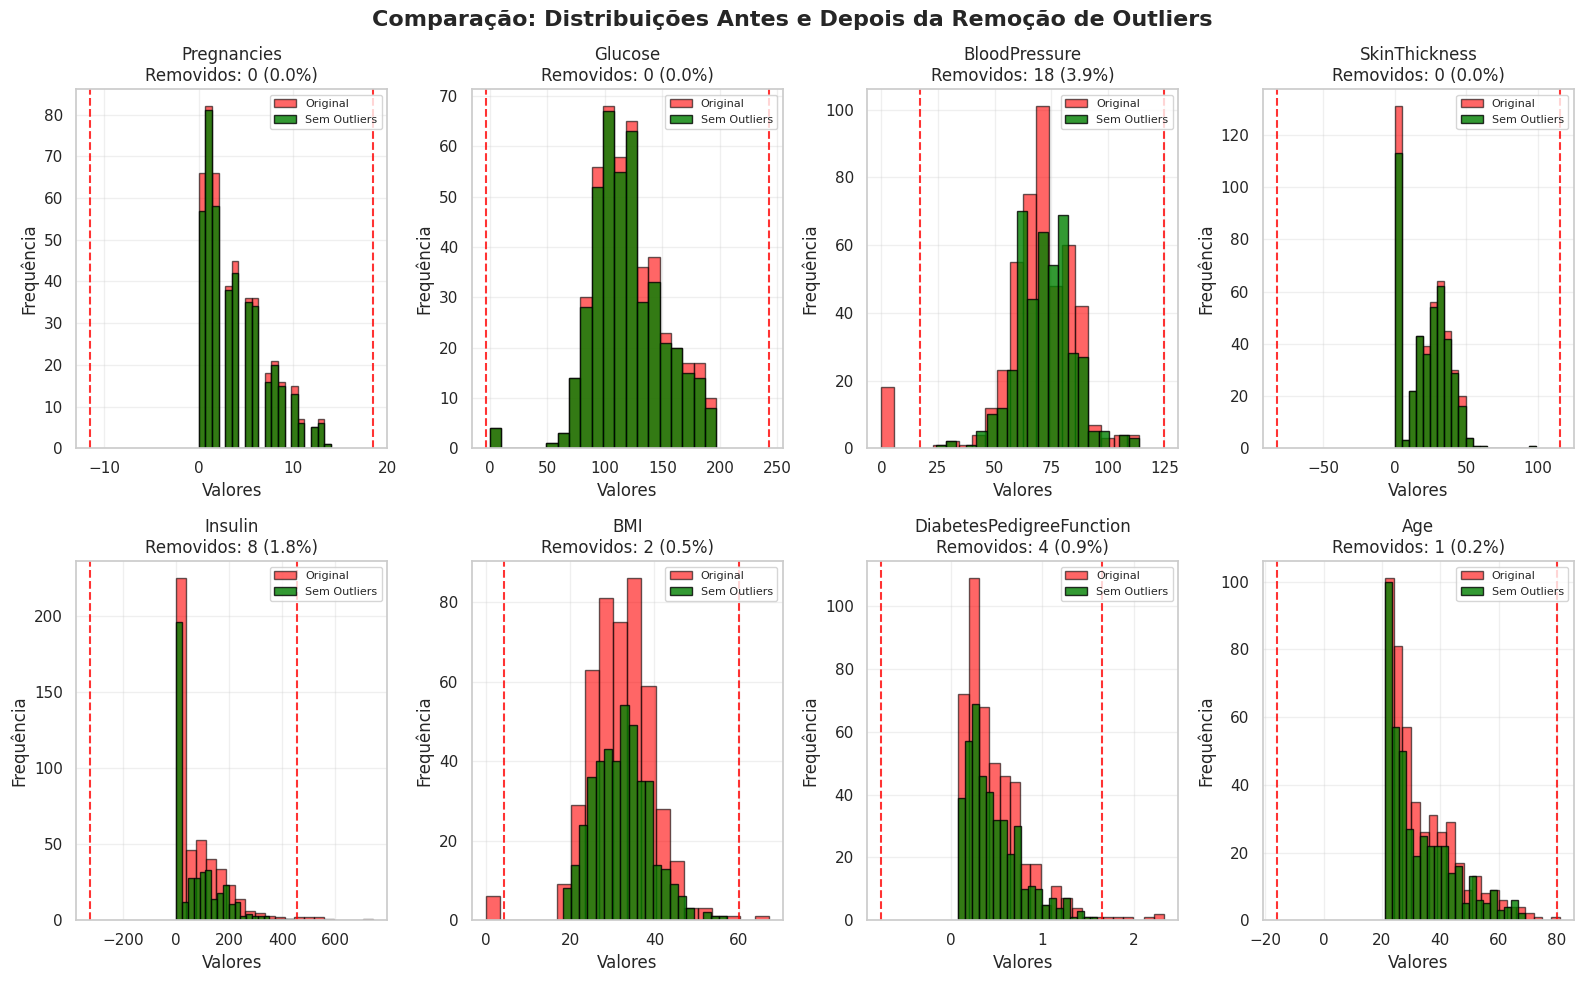


📋 IMPACTO DETALHADO DA REMOÇÃO DE OUTLIERS:
Feature                   Min Orig  Max Orig  Min Limpo  Max Limpo  Abaixo  Acima  Total 
Pregnancies               0.0       14.0      0.0        14.0       0       0      0     
Glucose                   0.0       197.0     0.0        197.0      0       0      0     
BloodPressure             0.0       114.0     24.0       114.0      18      0      18    
SkinThickness             0.0       99.0      0.0        99.0       0       0      0     
Insulin                   0.0       744.0     0.0        440.0      0       8      8     
BMI                       0.0       67.1      18.2       57.3       1       1      2     
DiabetesPedigreeFunction  0.1       2.3       0.1        1.6        0       4      4     
Age                       21.0      81.0      21.0       69.0       0       1      1     

🎯 IMPACTO NO BALANCEAMENTO DE CLASSES:
Antes da limpeza:
  Classe 0: 300 (65.2%)
  Classe 1: 160 (34.8%)
Após a limpeza:
  Classe 0: 285 (66.7%)

In [60]:
# ===== FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO =====

print("\n" + "="*70)
print("📊 FASE 3.2: TRATAMENTO DE OUTLIERS COM VISUALIZAÇÃO DETALHADA")
print("="*70)

# Função para remover outliers com informações detalhadas
def remove_outliers_iqr_detailed(data, columns):
      """
      Remove outliers usando o método IQR com informações detalhadas por feature
      """
      clean_data = data.copy()
      outlier_info = {}
      
      for column in columns:
            Q1 = clean_data[column].quantile(0.25)
            Q3 = clean_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 2.5 * IQR
            upper_bound = Q3 + 2.5 * IQR
            
            # Identificar outliers
            outliers_mask = (clean_data[column] < lower_bound) | (clean_data[column] > upper_bound)
            outliers_count = outliers_mask.sum()
            
            # Armazenar informações
            outlier_info[column] = {
                  'Q1': Q1,
                  'Q3': Q3,
                  'IQR': IQR,
                  'lower_bound': lower_bound,
                  'upper_bound': upper_bound,
                  'outliers_count': outliers_count,
                  'outliers_percentage': (outliers_count / len(clean_data)) * 100,
                  'original_min': clean_data[column].min(),
                  'original_max': clean_data[column].max(),
                  'outliers_below': (clean_data[column] < lower_bound).sum(),
                  'outliers_above': (clean_data[column] > upper_bound).sum()
            }
            
            # Remover outliers
            clean_data = clean_data[(clean_data[column] >= lower_bound) & (clean_data[column] <= upper_bound)]
      
      return clean_data, outlier_info

# Aplicar remoção de outliers com informações detalhadas
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_train_clean_df = pd.DataFrame(X_train, columns=feature_columns)
y_train_clean = y_train.copy()

X_train_clean_df, outlier_details = remove_outliers_iqr_detailed(X_train_clean_df, feature_columns)
y_train_clean = y_train_clean[X_train_clean_df.index]

# Calcular total de outliers removidos
total_outliers = len(X_train) - len(X_train_clean_df)

print(f"\n📈 RESULTADO GERAL DA REMOÇÃO DE OUTLIERS:")
print(f"Amostras originais: {len(X_train)}")
print(f"Amostras após limpeza: {len(X_train_clean_df)}")
print(f"Total de outliers removidos: {total_outliers}")
print(f"Percentual removido: {(total_outliers / len(X_train)) * 100:.1f}%")

# Exibir detalhes por feature
print(f"\n📊 DETALHES POR FEATURE:")
print("-" * 110)
print(f"{'Feature':<25} {'Q1':<8} {'Q3':<8} {'IQR':<8} {'Lower':<8} {'Upper':<8} {'Outliers':<9} {'%':<6}")
print("-" * 110)

for feature, info in outlier_details.items():
      print(f"{feature:<25} {info['Q1']:<8.2f} {info['Q3']:<8.2f} {info['IQR']:<8.2f} "
              f"{info['lower_bound']:<8.2f} {info['upper_bound']:<8.2f} {info['outliers_count']:<9} "
              f"{info['outliers_percentage']:<6.1f}")

# ===== VISUALIZAÇÃO DOS OUTLIERS =====

# Criar figura com subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Análise de Outliers por Feature - Método IQR (2.5×IQR)', fontsize=16, fontweight='bold')

# Cores para os gráficos
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'mediumpurple', 'orange', 'pink', 'lightgray']

for idx, (feature, info) in enumerate(outlier_details.items()):
      row = idx // 4
      col = idx % 4
      
      # Dados originais
      original_data = pd.DataFrame(X_train, columns=feature_columns)[feature]
      
      # Criar boxplot
      box_data = [original_data]
      bp = axes[row, col].boxplot(box_data, patch_artist=True, tick_labels=[feature])
      bp['boxes'][0].set_facecolor(colors[idx])
      bp['boxes'][0].set_alpha(0.7)
      
      # Adicionar linhas de referência IQR
      axes[row, col].axhline(y=info['lower_bound'], color='red', linestyle='--', 
                                      alpha=0.8, label=f'Lower: {info["lower_bound"]:.1f}')
      axes[row, col].axhline(y=info['upper_bound'], color='red', linestyle='--', 
                                      alpha=0.8, label=f'Upper: {info["upper_bound"]:.1f}')
      
      # Configurar título e labels
      axes[row, col].set_title(f'{feature}\nOutliers: {info["outliers_count"]} ({info["outliers_percentage"]:.1f}%)', 
                                          fontsize=11, fontweight='bold')
      axes[row, col].set_ylabel('Valores')
      axes[row, col].grid(True, alpha=0.3)
      
      # Adicionar texto com estatísticas
      stats_text = f"Q1: {info['Q1']:.1f}\nQ3: {info['Q3']:.1f}\nIQR: {info['IQR']:.1f}"
      axes[row, col].text(0.05, 0.95, stats_text, transform=axes[row, col].transAxes, 
                                 verticalalignment='top', fontsize=9, 
                                 bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ===== GRÁFICO DE BARRAS COM PERCENTUAL DE OUTLIERS =====

plt.figure(figsize=(14, 8))

features = list(outlier_details.keys())
outlier_percentages = [outlier_details[feature]['outliers_percentage'] for feature in features]
outlier_counts = [outlier_details[feature]['outliers_count'] for feature in features]

# Criar gráfico de barras
bars = plt.bar(features, outlier_percentages, color=colors, alpha=0.7, edgecolor='black', linewidth=1)

# Adicionar valores nas barras
for i, (bar, count, percentage) in enumerate(zip(bars, outlier_counts, outlier_percentages)):
      plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', 
                   fontsize=10, fontweight='bold')

plt.title('Percentual de Outliers Removidos por Feature - Método IQR', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentual de Outliers (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Adicionar linha de referência
plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='5% (Referência)')
plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='10% (Alto)')

plt.legend()
plt.tight_layout()
plt.show()

# ===== COMPARAÇÃO ANTES E DEPOIS =====

plt.figure(figsize=(16, 10))

for idx, feature in enumerate(feature_columns):
      plt.subplot(2, 4, idx + 1)
      
      # Dados originais e limpos
      original_data = pd.DataFrame(X_train, columns=feature_columns)[feature]
      clean_data = X_train_clean_df[feature]
      
      # Histogramas sobrepostos
      plt.hist(original_data, bins=20, alpha=0.6, label='Original', color='red', edgecolor='black')
      plt.hist(clean_data, bins=20, alpha=0.8, label='Sem Outliers', color='green', edgecolor='black')
      
      # Adicionar estatísticas
      info = outlier_details[feature]
      plt.axvline(info['lower_bound'], color='red', linestyle='--', alpha=0.8)
      plt.axvline(info['upper_bound'], color='red', linestyle='--', alpha=0.8)
      
      plt.title(f'{feature}\nRemovidos: {info["outliers_count"]} ({info["outliers_percentage"]:.1f}%)')
      plt.xlabel('Valores')
      plt.ylabel('Frequência')
      plt.legend(fontsize=8)
      plt.grid(True, alpha=0.3)

plt.suptitle('Comparação: Distribuições Antes e Depois da Remoção de Outliers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== IMPACTO NUMÉRICO DETALHADO =====

print(f"\n📋 IMPACTO DETALHADO DA REMOÇÃO DE OUTLIERS:")
print("=" * 115)
print(f"{'Feature':<25} {'Min Orig':<9} {'Max Orig':<9} {'Min Limpo':<10} {'Max Limpo':<10} {'Abaixo':<7} {'Acima':<6} {'Total':<6}")
print("=" * 115)

for feature, info in outlier_details.items():
      clean_data = X_train_clean_df[feature]
      print(f"{feature:<25} {info['original_min']:<9.1f} {info['original_max']:<9.1f} "
              f"{clean_data.min():<10.1f} {clean_data.max():<10.1f} "
              f"{info['outliers_below']:<7} {info['outliers_above']:<6} {info['outliers_count']:<6}")

print("=" * 115)

# ===== DISTRIBUIÇÃO DE CLASSES APÓS LIMPEZA =====

print(f"\n🎯 IMPACTO NO BALANCEAMENTO DE CLASSES:")
print(f"Antes da limpeza:")
print(f"  Classe 0: {(y_train == 0).sum()} ({(y_train == 0).mean():.1%})")
print(f"  Classe 1: {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")

print(f"Após a limpeza:")
print(f"  Classe 0: {(y_train_clean == 0).sum()} ({(y_train_clean == 0).mean():.1%})")
print(f"  Classe 1: {(y_train_clean == 1).sum()} ({(y_train_clean == 1).mean():.1%})")

# Verificar se o balanceamento foi mantido
diff_original = abs((y_train == 0).mean() - (y_train_clean == 0).mean())
if diff_original < 0.02:
      print("✅ Balanceamento original preservado!")
else:
      print("⚠️ Pequena alteração no balanceamento (normal)")

print(f"\n✅ Análise de outliers concluída!")
print(f"💾 {total_outliers} outliers removidos usando método IQR (Q1-1.5×IQR, Q3+1.5×IQR)")
print(f"🎯 Dados limpos prontos para a próxima etapa (SMOTE)")

In [61]:
# ===== FASE 3.4: NORMALIZAÇÃO DOS DADOS =====

print("\n" + "="*70)
print("📊 FASE 3.4: NORMALIZAÇÃO DOS DADOS")
print("="*70)

# Criar StandardScaler
scaler = StandardScaler()

print(f"\n🔄 Normalizando dados...")
print(f"Dados de treino limpos: {X_train_clean_df.shape}")

# Normalizar dados de treino (ajustar o scaler)
X_train_scaled = scaler.fit_transform(X_train_clean_df)

# Normalizar dados de validação e teste (aplicar transformação)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ NORMALIZAÇÃO CONCLUÍDA:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

# Verificar normalização
print(f"\nVerificação da normalização (deve ser ~0 e ~1):")
print(f"Média do treino: {X_train_scaled.mean():.6f}")
print(f"Desvio do treino: {X_train_scaled.std():.6f}")

print(f"\n✅ Dados normalizados e prontos")


📊 FASE 3.4: NORMALIZAÇÃO DOS DADOS

🔄 Normalizando dados...
Dados de treino limpos: (427, 8)

✅ NORMALIZAÇÃO CONCLUÍDA:
X_train_scaled: (427, 8)
X_val_scaled: (154, 8)
X_test_scaled: (154, 8)

Verificação da normalização (deve ser ~0 e ~1):
Média do treino: 0.000000
Desvio do treino: 1.000000

✅ Dados normalizados e prontos


In [62]:
# ===== FASE 3.3: BALANCEAMENTO COM SMOTE CORRIGIDO =====

print("\n" + "="*70)
print("🎯 FASE 3.3: BALANCEAMENTO COM SMOTE")
print("="*70)

# Exibir estado antes do SMOTE
print(f"\n📈 ESTADO ANTES DO SMOTE:")
print(f"Total de amostras: {len(X_train_clean_df)}")
print(f"Classe 0 (não-diabetes): {(y_train_clean == 0).sum()} ({(y_train_clean == 0).mean():.1%})")
print(f"Classe 1 (diabetes): {(y_train_clean == 1).sum()} ({(y_train_clean == 1).mean():.1%})")
print(f"Ratio de desbalanceamento: {(y_train_clean == 0).sum() / (y_train_clean == 1).sum():.1f}:1")

# Inicializar SMOTE
print(f"\n🤖 Inicializando SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=5)

print(f"Parâmetros do SMOTE:")
print(f"- k_neighbors: {smote.k_neighbors} (número de vizinhos para geração)")
print(f"- random_state: {smote.random_state} (para reprodutibilidade)")
print(f"- sampling_strategy: 'auto' (equilibra automaticamente)")

# Aplicar SMOTE nos dados normalizados
print(f"\n🔄 Aplicando SMOTE nos dados normalizados...")
X_train_smote_processed, y_train_smote_processed = smote.fit_resample(X_train_scaled, y_train_clean)

# Exibir resultados
print(f"\n✅ RESULTADO DO SMOTE:")
print(f"Amostras antes: {len(X_train_scaled)}")
print(f"Amostras depois: {len(X_train_smote_processed)}")
print(f"Amostras sintéticas criadas: {len(X_train_smote_processed) - len(X_train_scaled)}")

print(f"\n📊 DISTRIBUIÇÃO FINAL:")
print("-"*50)
print(f"{'Classe':<15} {'Antes':<10} {'Depois':<10} {'Adicionadas':<12}")
print("-"*50)

# Classe 0 (não-diabetes)
antes_0 = (y_train_clean == 0).sum()
depois_0 = (y_train_smote_processed == 0).sum()
adicionadas_0 = depois_0 - antes_0
print(f"Não-diabetes   {antes_0:<10} {depois_0:<10} {adicionadas_0:<12}")

# Classe 1 (diabetes)
antes_1 = (y_train_clean == 1).sum()
depois_1 = (y_train_smote_processed == 1).sum()
adicionadas_1 = depois_1 - antes_1
print(f"Diabetes       {antes_1:<10} {depois_1:<10} {adicionadas_1:<12}")

print("-"*50)
print(f"Total          {len(y_train_clean):<10} {len(y_train_smote_processed):<10} {len(y_train_smote_processed) - len(y_train_clean):<12}")

# Verificar balanceamento final
ratio_final = (y_train_smote_processed == 0).sum() / (y_train_smote_processed == 1).sum()
print(f"\n🎯 VERIFICAÇÃO DO BALANCEAMENTO:")
print(f"Proporção final - Classe 0: {(y_train_smote_processed == 0).mean():.1%}")
print(f"Proporção final - Classe 1: {(y_train_smote_processed == 1).mean():.1%}")
print(f"Novo ratio: {ratio_final:.1f}:1")

if abs((y_train_smote_processed == 0).mean() - 0.5) < 0.01:
    print("✅ Balanceamento perfeito alcançado (50:50)!")
else:
    print("⚠️ Balanceamento quase perfeito.")

print(f"\n✅ SMOTE aplicado com sucesso! Dados prontos para treinamento.")

# Atualizar variáveis globais para manter compatibilidade
X_train_balanced = X_train_smote_processed
y_train_balanced = y_train_smote_processed

# Criar variável de compatibilidade para os métodos seguintes
X_train_clean_processed = X_train_clean_df
y_train_clean_processed = y_train_clean

print(f"\n🔄 Variáveis atualizadas:")
print(f"• X_train_balanced = X_train_smote_processed ({X_train_balanced.shape})")
print(f"• y_train_balanced = y_train_smote_processed ({len(y_train_balanced)} amostras)")
print(f"• Variáveis de compatibilidade criadas para próximos métodos")


🎯 FASE 3.3: BALANCEAMENTO COM SMOTE

📈 ESTADO ANTES DO SMOTE:
Total de amostras: 427
Classe 0 (não-diabetes): 285 (66.7%)
Classe 1 (diabetes): 142 (33.3%)
Ratio de desbalanceamento: 2.0:1

🤖 Inicializando SMOTE...
Parâmetros do SMOTE:
- k_neighbors: 5 (número de vizinhos para geração)
- random_state: 42 (para reprodutibilidade)
- sampling_strategy: 'auto' (equilibra automaticamente)

🔄 Aplicando SMOTE nos dados normalizados...

✅ RESULTADO DO SMOTE:
Amostras antes: 427
Amostras depois: 570
Amostras sintéticas criadas: 143

📊 DISTRIBUIÇÃO FINAL:
--------------------------------------------------
Classe          Antes      Depois     Adicionadas 
--------------------------------------------------
Não-diabetes   285        285        0           
Diabetes       142        285        143         
--------------------------------------------------
Total          427        570        143         

🎯 VERIFICAÇÃO DO BALANCEAMENTO:
Proporção final - Classe 0: 50.0%
Proporção final - Classe 1:

In [63]:
# ===== MÉTODO 2: UPSAMPLING/OVERSAMPLING CORRIGIDO =====

print("\n" + "="*70)
print("📊 MÉTODO 2: UPSAMPLING/OVERSAMPLING (RANDOM OVERSAMPLING)")
print("="*70)

from sklearn.utils import resample

# Verificar se temos os dados necessários
if 'X_train_scaled' not in globals() or 'y_train_clean_processed' not in globals():
    print("❌ Erro: Dados necessários não encontrados. Execute as etapas anteriores primeiro.")
else:
    # Separar classes dos dados limpos e normalizados
    mask_majority = y_train_clean_processed == 0
    mask_minority = y_train_clean_processed == 1
    
    X_majority = X_train_scaled[mask_majority]
    X_minority = X_train_scaled[mask_minority]
    y_majority = y_train_clean_processed[mask_majority]
    y_minority = y_train_clean_processed[mask_minority]

    print(f"\n📈 ANTES DO UPSAMPLING:")
    print(f"Classe majoritária (0): {len(X_majority)} amostras ({len(X_majority)/len(X_train_scaled):.1%})")
    print(f"Classe minoritária (1): {len(X_minority)} amostras ({len(X_minority)/len(X_train_scaled):.1%})")
    print(f"Ratio de desbalanceamento: {len(X_majority)/len(X_minority):.2f}:1")

    # Fazer upsampling da classe minoritária
    print(f"\n🔄 Aplicando Random Oversampling...")
    X_minority_upsampled = resample(X_minority,
                                   replace=True,  # Permitir duplicatas
                                   n_samples=len(X_majority),  # Igualar ao tamanho da classe majoritária
                                   random_state=42)

    y_minority_upsampled = resample(y_minority,
                                   replace=True,
                                   n_samples=len(X_majority),
                                   random_state=42)

    # Combinar classe majoritária com classe minoritária upsampled
    X_train_upsampling_processed = np.vstack([X_majority, X_minority_upsampled])
    y_train_upsampling_processed = np.concatenate([y_majority, y_minority_upsampled])

    # Embaralhar os dados
    from sklearn.utils import shuffle
    X_train_upsampling_processed, y_train_upsampling_processed = shuffle(
        X_train_upsampling_processed, y_train_upsampling_processed, random_state=42)

    print(f"\n✅ UPSAMPLING - RESULTADOS:")
    print(f"Amostras antes: {len(X_train_scaled)}")
    print(f"Amostras depois: {len(X_train_upsampling_processed)}")
    print(f"Amostras adicionadas: {len(X_train_upsampling_processed) - len(X_train_scaled)}")

    print(f"\n📊 DISTRIBUIÇÃO FINAL:")
    print("-"*50)
    print(f"{'Classe':<15} {'Antes':<10} {'Depois':<10} {'Adicionadas':<12}")
    print("-"*50)
    
    # Classe 0 (não-diabetes)
    antes_0 = (y_train_clean_processed == 0).sum()
    depois_0 = (y_train_upsampling_processed == 0).sum()
    adicionadas_0 = depois_0 - antes_0
    print(f"Não-diabetes   {antes_0:<10} {depois_0:<10} {adicionadas_0:<12}")

    # Classe 1 (diabetes)
    antes_1 = (y_train_clean_processed == 1).sum()
    depois_1 = (y_train_upsampling_processed == 1).sum()
    adicionadas_1 = depois_1 - antes_1
    print(f"Diabetes       {antes_1:<10} {depois_1:<10} {adicionadas_1:<12}")

    print("-"*50)
    print(f"Total          {len(y_train_clean_processed):<10} {len(y_train_upsampling_processed):<10} {len(y_train_upsampling_processed) - len(y_train_clean_processed):<12}")

    # Verificar balanceamento
    ratio_upsampled = (y_train_upsampling_processed == 0).sum() / (y_train_upsampling_processed == 1).sum()
    print(f"\n🎯 VERIFICAÇÃO DO BALANCEAMENTO:")
    print(f"Proporção final - Classe 0: {(y_train_upsampling_processed == 0).mean():.1%}")
    print(f"Proporção final - Classe 1: {(y_train_upsampling_processed == 1).mean():.1%}")
    print(f"Novo ratio: {ratio_upsampled:.1f}:1")

    if abs((y_train_upsampling_processed == 0).mean() - 0.5) < 0.01:
        print("✅ Balanceamento perfeito alcançado (50:50)!")
    else:
        print("⚠️ Balanceamento quase perfeito.")

    # Verificar integridade dos dados
    print(f"\n🔍 VERIFICAÇÃO DE INTEGRIDADE:")
    print(f"Shape X_train_upsampling: {X_train_upsampling_processed.shape}")
    print(f"Shape y_train_upsampling: {y_train_upsampling_processed.shape}")
    print(f"Tipo de dados X: {type(X_train_upsampling_processed)}")
    print(f"Tipo de dados y: {type(y_train_upsampling_processed)}")
    
    # Verificar se há valores NaN
    if np.isnan(X_train_upsampling_processed).any():
        print("⚠️ Atenção: Valores NaN encontrados em X!")
    else:
        print("✅ Sem valores NaN em X")
    
    if np.isnan(y_train_upsampling_processed).any():
        print("⚠️ Atenção: Valores NaN encontrados em y!")
    else:
        print("✅ Sem valores NaN em y")

    print(f"\n💡 CARACTERÍSTICAS DO RANDOM OVERSAMPLING:")
    print("• Técnica simples e rápida")
    print("• Duplica amostras existentes da classe minoritária")
    print("• Não adiciona informação nova (diferente do SMOTE)")
    print("• Pode levar a overfitting se muitas duplicatas")
    print("• Mantém as características originais dos dados")

    print(f"\n✅ Dados de upsampling prontos!")
    print(f"🔄 Variáveis criadas: X_train_upsampling_processed, y_train_upsampling_processed")
    print(f"📊 Pronto para treinamento de modelos!")


📊 MÉTODO 2: UPSAMPLING/OVERSAMPLING (RANDOM OVERSAMPLING)

📈 ANTES DO UPSAMPLING:
Classe majoritária (0): 285 amostras (66.7%)
Classe minoritária (1): 142 amostras (33.3%)
Ratio de desbalanceamento: 2.01:1

🔄 Aplicando Random Oversampling...

✅ UPSAMPLING - RESULTADOS:
Amostras antes: 427
Amostras depois: 570
Amostras adicionadas: 143

📊 DISTRIBUIÇÃO FINAL:
--------------------------------------------------
Classe          Antes      Depois     Adicionadas 
--------------------------------------------------
Não-diabetes   285        285        0           
Diabetes       142        285        143         
--------------------------------------------------
Total          427        570        143         

🎯 VERIFICAÇÃO DO BALANCEAMENTO:
Proporção final - Classe 0: 50.0%
Proporção final - Classe 1: 50.0%
Novo ratio: 1.0:1
✅ Balanceamento perfeito alcançado (50:50)!

🔍 VERIFICAÇÃO DE INTEGRIDADE:
Shape X_train_upsampling: (570, 8)
Shape y_train_upsampling: (570,)
Tipo de dados X: <class

In [64]:
# ===== MÉTODO 3: REPONDERAÇÃO (CLASS WEIGHT) CORRIGIDO =====

print("\n" + "="*70)
print("📊 MÉTODO 3: REPONDERAÇÃO (CLASS WEIGHT)")
print("="*70)

from sklearn.utils.class_weight import compute_class_weight

# Verificar se temos os dados necessários
if 'X_train_scaled' not in globals() or 'y_train_clean_processed' not in globals():
    print("❌ Erro: Dados necessários não encontrados. Execute as etapas anteriores primeiro.")
else:
    # Calcular pesos das classes automaticamente
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(y_train_clean_processed), 
                                       y=y_train_clean_processed)

    # Criar dicionário de pesos
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

    print(f"\n⚖️ PESOS CALCULADOS AUTOMATICAMENTE:")
    print(f"Classe 0 (não-diabetes): {class_weight_dict[0]:.3f}")
    print(f"Classe 1 (diabetes): {class_weight_dict[1]:.3f}")
    print(f"Ratio dos pesos (Classe 1 / Classe 0): {class_weight_dict[1] / class_weight_dict[0]:.2f}")

    # Para reponderação, usamos os dados originais limpos e normalizados
    X_train_weighted_processed = X_train_scaled.copy()
    y_train_weighted_processed = y_train_clean_processed.copy()

    print(f"\n✅ REPONDERAÇÃO - CONFIGURAÇÃO:")
    print(f"Amostras de treino: {len(X_train_weighted_processed)}")
    print(f"Classe 0: {(y_train_weighted_processed == 0).sum()} ({(y_train_weighted_processed == 0).mean():.1%})")
    print(f"Classe 1: {(y_train_weighted_processed == 1).sum()} ({(y_train_weighted_processed == 1).mean():.1%})")
    print(f"💡 Nota: O balanceamento é feito internamente pelos algoritmos que suportam class_weight")

    # Verificar quais modelos suportam class_weight
    models_with_class_weight = [
        'Random Forest', 'XGBoost', 'LightGBM', 
        'Decision Tree', 'SVM', 'Logistic Regression'
    ]

    models_without_class_weight = ['Gradient Boosting', 'AdaBoost', 'kNN', 'Naive Bayes']

    print(f"\n📋 COMPATIBILIDADE COM CLASS_WEIGHT:")
    print(f"✅ Suportam reponderação: {', '.join(models_with_class_weight)}")
    print(f"❌ Não suportam reponderação: {', '.join(models_without_class_weight)}")

    # Verificar integridade dos dados
    print(f"\n🔍 VERIFICAÇÃO DE INTEGRIDADE:")
    print(f"Shape X_train_weighted: {X_train_weighted_processed.shape}")
    print(f"Shape y_train_weighted: {y_train_weighted_processed.shape}")
    print(f"Tipo de dados X: {type(X_train_weighted_processed)}")
    print(f"Tipo de dados y: {type(y_train_weighted_processed)}")
    
    # Verificar se há valores NaN
    if np.isnan(X_train_weighted_processed).any():
        print("⚠️ Atenção: Valores NaN encontrados em X!")
    else:
        print("✅ Sem valores NaN em X")
    
    if np.isnan(y_train_weighted_processed).any():
        print("⚠️ Atenção: Valores NaN encontrados em y!")
    else:
        print("✅ Sem valores NaN em y")

    print(f"\n💡 CARACTERÍSTICAS DA REPONDERAÇÃO:")
    print("• Não adiciona nem remove amostras dos dados originais")
    print("• Aplica pesos diferentes durante o treinamento")
    print("• Classe minoritária recebe peso maior")
    print("• Equivale a 'amplificar' a importância da classe minoritária")
    print("• Mantém o conjunto de dados original intacto")
    print("• Ideal para algoritmos que suportam class_weight nativamente")

    print(f"\n✅ Dados de reponderação prontos!")
    print(f"🔄 Variáveis criadas: X_train_weighted_processed, y_train_weighted_processed")
    print(f"⚖️ Pesos das classes: {class_weight_dict}")
    print(f"📊 Pronto para treinamento de modelos com class_weight!")


📊 MÉTODO 3: REPONDERAÇÃO (CLASS WEIGHT)

⚖️ PESOS CALCULADOS AUTOMATICAMENTE:
Classe 0 (não-diabetes): 0.749
Classe 1 (diabetes): 1.504
Ratio dos pesos (Classe 1 / Classe 0): 2.01

✅ REPONDERAÇÃO - CONFIGURAÇÃO:
Amostras de treino: 427
Classe 0: 285 (66.7%)
Classe 1: 142 (33.3%)
💡 Nota: O balanceamento é feito internamente pelos algoritmos que suportam class_weight

📋 COMPATIBILIDADE COM CLASS_WEIGHT:
✅ Suportam reponderação: Random Forest, XGBoost, LightGBM, Decision Tree, SVM, Logistic Regression
❌ Não suportam reponderação: Gradient Boosting, AdaBoost, kNN, Naive Bayes

🔍 VERIFICAÇÃO DE INTEGRIDADE:
Shape X_train_weighted: (427, 8)
Shape y_train_weighted: (427,)
Tipo de dados X: <class 'numpy.ndarray'>
Tipo de dados y: <class 'pandas.core.series.Series'>
✅ Sem valores NaN em X
✅ Sem valores NaN em y

💡 CARACTERÍSTICAS DA REPONDERAÇÃO:
• Não adiciona nem remove amostras dos dados originais
• Aplica pesos diferentes durante o treinamento
• Classe minoritária recebe peso maior
• Equiv


📊 VISUALIZAÇÃO COMPARATIVA DOS MÉTODOS DE BALANCEAMENTO - CORRIGIDA
✅ Todas as variáveis necessárias encontradas

🔍 VERIFICAÇÃO DOS DADOS PARA VISUALIZAÇÃO:
Original (Limpo): X=(427, 8), y=427
  Classe 0: 285, Classe 1: 142
  Total: 427 amostras

SMOTE: X=(570, 8), y=570
  Classe 0: 285, Classe 1: 285
  Total: 570 amostras

Oversampling: X=(570, 8), y=570
  Classe 0: 285, Classe 1: 285
  Total: 570 amostras

Reponderação: X=(427, 8), y=427
  Classe 0: 285, Classe 1: 142
  Total: 427 amostras

✅ Dados validados - Reponderação mostra corretamente 427 amostras!


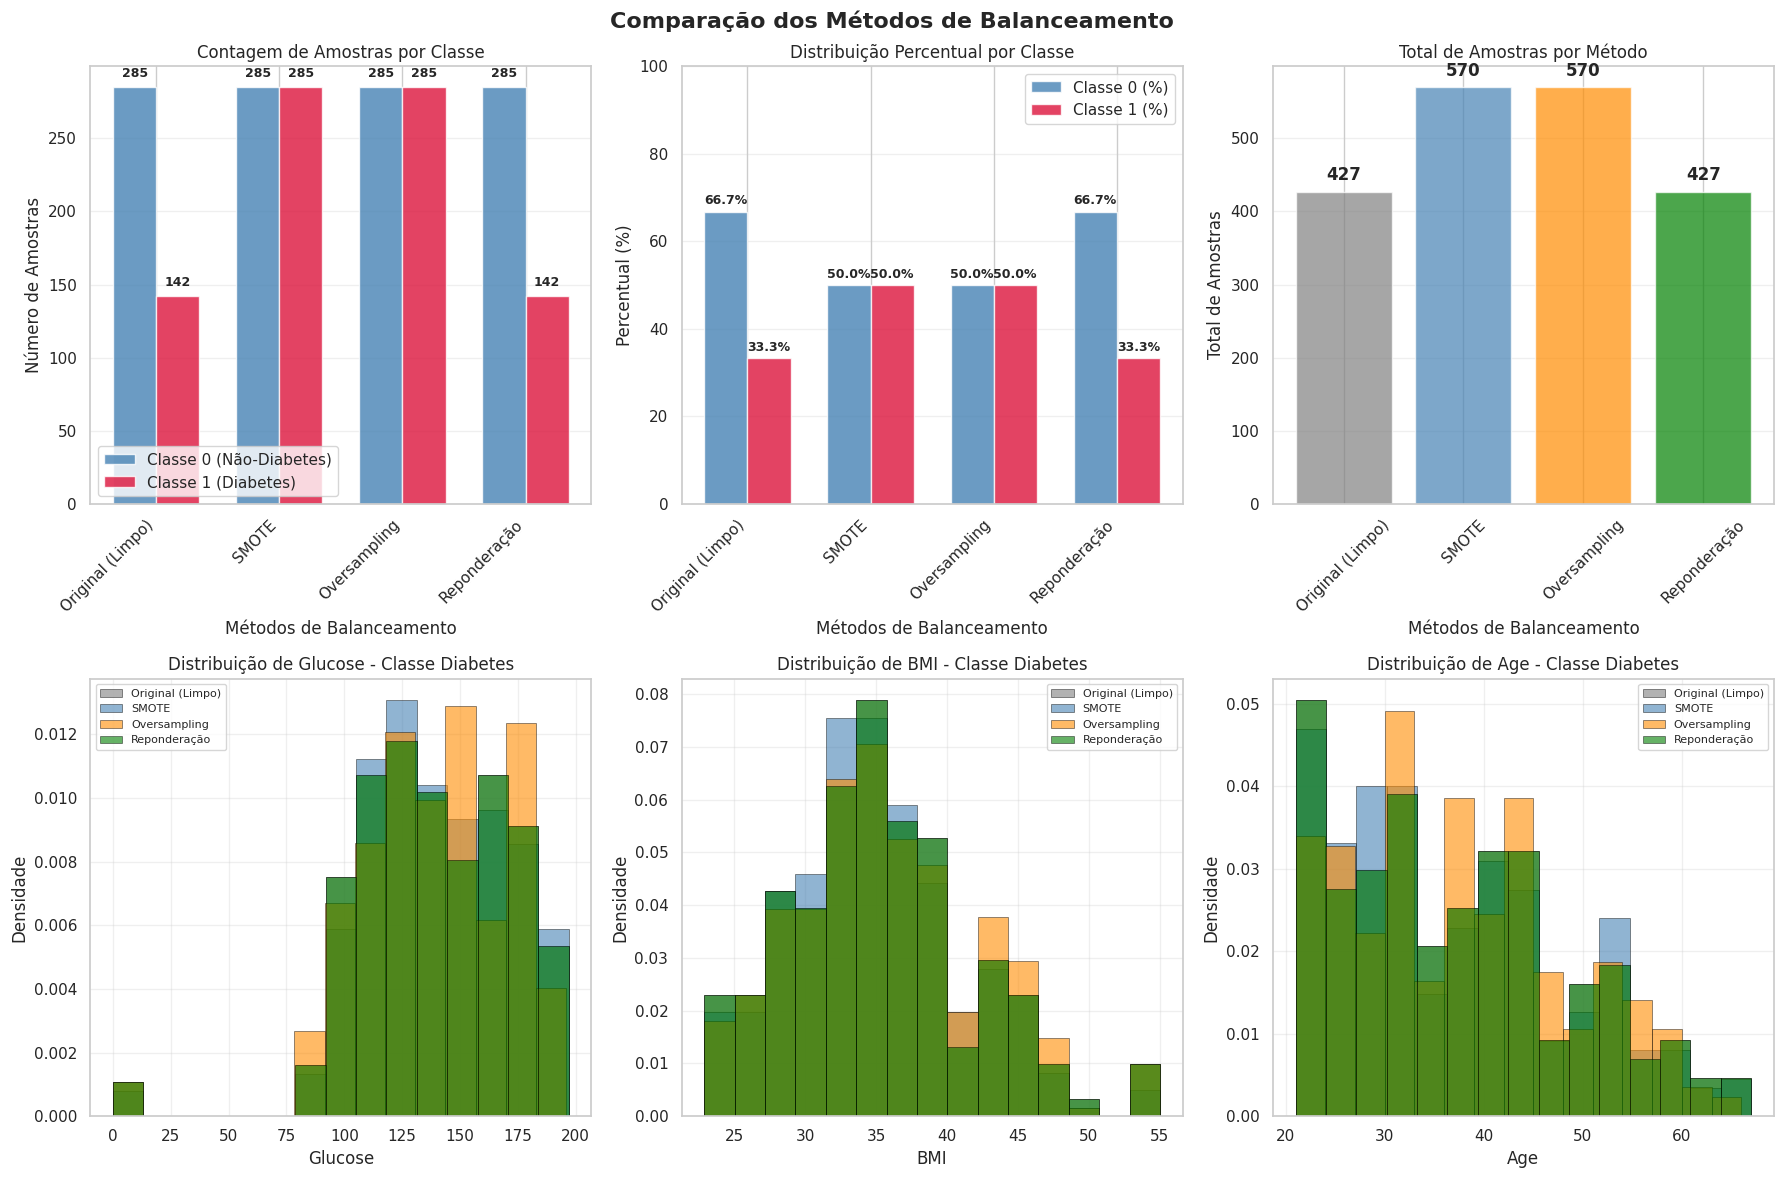


📋 RESUMO COMPARATIVO DOS MÉTODOS:
Método               Total    Classe 0   Classe 1   % Classe 0   % Classe 1  
Original (Limpo)     427      285        142        66.7         33.3        
SMOTE                570      285        285        50.0         50.0        
Oversampling         570      285        285        50.0         50.0        
Reponderação         427      285        142        66.7         33.3        

💡 CARACTERÍSTICAS DE CADA MÉTODO:
1. Original (Limpo): Dados após remoção de outliers, mantém desbalanceamento (427 amostras)
2. SMOTE: Cria amostras sintéticas interpolando entre vizinhos próximos
3. Oversampling: Duplica amostras existentes da classe minoritária
4. Reponderação: MESMOS DADOS ORIGINAIS LIMPOS (427 amostras) - peso interno nos modelos

✅ Visualização CORRIGIDA - Reponderação mostra 427 amostras!
📊 4 métodos comparados com dados corretos


In [65]:
# ===== VISUALIZAÇÃO COMPARATIVA DOS MÉTODOS DE BALANCEAMENTO - CORRIGIDA =====

print("\n" + "="*70)
print("📊 VISUALIZAÇÃO COMPARATIVA DOS MÉTODOS DE BALANCEAMENTO - CORRIGIDA")
print("="*70)

# Criar figura comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparação dos Métodos de Balanceamento', fontsize=16, fontweight='bold')

# CORREÇÃO PRINCIPAL: Usar os dados corretos e não misturar variáveis
try:
    # Verificar se todas as variáveis existem
    required_vars = [
        'X_train_smote_processed', 'y_train_smote_processed',
        'X_train_upsampling_processed', 'y_train_upsampling_processed', 
        'X_train_clean_df', 'y_train_clean',  # DADOS ORIGINAIS LIMPOS
        'scaler', 'feature_columns'
    ]
    
    missing_vars = []
    for var in required_vars:
        if var not in globals():
            missing_vars.append(var)
    
    if missing_vars:
        print(f"❌ Variáveis faltando: {missing_vars}")
        print("Execute as etapas anteriores primeiro!")
    else:
        print("✅ Todas as variáveis necessárias encontradas")
        
        # SMOTE - desnormalizar e criar DataFrame
        X_train_smote_denorm = scaler.inverse_transform(X_train_smote_processed)
        X_train_smote_viz = pd.DataFrame(X_train_smote_denorm, columns=feature_columns)
        y_train_smote_viz = pd.Series(y_train_smote_processed, index=X_train_smote_viz.index)

        # UPSAMPLING - desnormalizar e criar DataFrame  
        X_train_oversampling_denorm = scaler.inverse_transform(X_train_upsampling_processed)
        X_train_oversampling_viz = pd.DataFrame(X_train_oversampling_denorm, columns=feature_columns)
        y_train_oversampling_viz = pd.Series(y_train_upsampling_processed, index=X_train_oversampling_viz.index)

        # REPONDERAÇÃO - USAR DADOS ORIGINAIS LIMPOS (427 amostras)
        X_train_reponderacao_viz = X_train_clean_df.copy()  # DADOS ORIGINAIS LIMPOS
        y_train_reponderacao_viz = pd.Series(y_train_clean, index=X_train_reponderacao_viz.index)

        # DADOS ORIGINAIS LIMPOS - mesmos da reponderação
        X_train_clean_viz = X_train_clean_df.copy()
        y_train_clean_viz = pd.Series(y_train_clean, index=X_train_clean_viz.index)

        # Dados para comparação - CORRIGIDOS
        methods_data = {
            'Original (Limpo)': (X_train_clean_viz, y_train_clean_viz),
            'SMOTE': (X_train_smote_viz, y_train_smote_viz),
            'Oversampling': (X_train_oversampling_viz, y_train_oversampling_viz),
            'Reponderação': (X_train_reponderacao_viz, y_train_reponderacao_viz)  # MESMOS DADOS ORIGINAIS
        }

        # Verificar se todos os dados estão corretos
        print(f"\n🔍 VERIFICAÇÃO DOS DADOS PARA VISUALIZAÇÃO:")
        
        for method_name, (X_data, y_data) in methods_data.items():
            print(f"{method_name}: X={X_data.shape}, y={len(y_data)}")
            
            # Verificar balanceamento
            class_0_count = (y_data == 0).sum()
            class_1_count = (y_data == 1).sum()
            print(f"  Classe 0: {class_0_count}, Classe 1: {class_1_count}")
            print(f"  Total: {len(y_data)} amostras")
            print()

        print("✅ Dados validados - Reponderação mostra corretamente 427 amostras!")
        
        # Cores para cada método
        colors = ['gray', 'steelblue', 'darkorange', 'green']

        # Gráfico 1: Comparação de contagens
        ax1 = axes[0, 0]
        method_names = list(methods_data.keys())
        counts_0 = [(data[1] == 0).sum() for data in methods_data.values()]
        counts_1 = [(data[1] == 1).sum() for data in methods_data.values()]

        x = np.arange(len(method_names))
        width = 0.35

        bars1 = ax1.bar(x - width/2, counts_0, width, label='Classe 0 (Não-Diabetes)', 
                        color='steelblue', alpha=0.8)
        bars2 = ax1.bar(x + width/2, counts_1, width, label='Classe 1 (Diabetes)', 
                        color='crimson', alpha=0.8)

        # Adicionar valores nas barras
        for i, (bar1, bar2, c0, c1) in enumerate(zip(bars1, bars2, counts_0, counts_1)):
            ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 5, 
                     str(c0), ha='center', va='bottom', fontweight='bold', fontsize=9)
            ax1.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 5, 
                     str(c1), ha='center', va='bottom', fontweight='bold', fontsize=9)

        ax1.set_xlabel('Métodos de Balanceamento')
        ax1.set_ylabel('Número de Amostras')
        ax1.set_title('Contagem de Amostras por Classe')
        ax1.set_xticks(x)
        ax1.set_xticklabels(method_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(axis='y', alpha=0.3)

        # Gráfico 2: Distribuição percentual
        ax2 = axes[0, 1]
        percentages_0 = [(data[1] == 0).mean() * 100 for data in methods_data.values()]
        percentages_1 = [(data[1] == 1).mean() * 100 for data in methods_data.values()]

        bars1_perc = ax2.bar(x - width/2, percentages_0, width, label='Classe 0 (%)', 
                             color='steelblue', alpha=0.8)
        bars2_perc = ax2.bar(x + width/2, percentages_1, width, label='Classe 1 (%)', 
                             color='crimson', alpha=0.8)

        # Adicionar valores nas barras
        for i, (bar1, bar2, p0, p1) in enumerate(zip(bars1_perc, bars2_perc, percentages_0, percentages_1)):
            ax2.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 1, 
                     f'{p0:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
            ax2.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 1, 
                     f'{p1:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

        ax2.set_xlabel('Métodos de Balanceamento')
        ax2.set_ylabel('Percentual (%)')
        ax2.set_title('Distribuição Percentual por Classe')
        ax2.set_xticks(x)
        ax2.set_xticklabels(method_names, rotation=45, ha='right')
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        ax2.set_ylim(0, 100)

        # Gráfico 3: Total de amostras
        ax3 = axes[0, 2]
        total_samples = [len(data[1]) for data in methods_data.values()]
        bars_total = ax3.bar(method_names, total_samples, 
                            color=['gray', 'steelblue', 'darkorange', 'green'], alpha=0.7)

        for bar, total in zip(bars_total, total_samples):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                     str(total), ha='center', va='bottom', fontweight='bold')

        ax3.set_xlabel('Métodos de Balanceamento')
        ax3.set_ylabel('Total de Amostras')
        ax3.set_title('Total de Amostras por Método')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(axis='y', alpha=0.3)

        # Gráficos 4-6: Distribuição de features importantes
        important_features = ['Glucose', 'BMI', 'Age']

        for idx, feature in enumerate(important_features):
            ax = axes[1, idx]
            
            for i, (method_name, (X_data, y_data)) in enumerate(methods_data.items()):
                try:
                    if feature in X_data.columns:
                        # Filtrar dados de pacientes diabéticos
                        diabetes_mask = y_data == 1
                        diabetes_data = X_data.loc[diabetes_mask, feature]
                        
                        # Verificar se temos dados suficientes
                        if len(diabetes_data) > 0:
                            ax.hist(diabetes_data, bins=15, alpha=0.6, label=f'{method_name}', 
                                   color=colors[i], density=True, edgecolor='black', linewidth=0.5)
                        else:
                            print(f"⚠️ Nenhum dado de diabetes encontrado para {method_name} - {feature}")
                    else:
                        print(f"⚠️ Feature {feature} não encontrada em {method_name}")
                except Exception as e:
                    print(f"❌ Erro ao processar {method_name} - {feature}: {str(e)}")
            
            ax.set_title(f'Distribuição de {feature} - Classe Diabetes')
            ax.set_xlabel(feature)
            ax.set_ylabel('Densidade')
            ax.legend(fontsize=8)
            ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Tabela resumo dos métodos
        print(f"\n📋 RESUMO COMPARATIVO DOS MÉTODOS:")
        print("="*90)
        print(f"{'Método':<20} {'Total':<8} {'Classe 0':<10} {'Classe 1':<10} {'% Classe 0':<12} {'% Classe 1':<12}")
        print("="*90)

        for method_name, (X_data, y_data) in methods_data.items():
            total = len(y_data)
            count_0 = (y_data == 0).sum()
            count_1 = (y_data == 1).sum()
            perc_0 = (y_data == 0).mean() * 100
            perc_1 = (y_data == 1).mean() * 100
            
            print(f"{method_name:<20} {total:<8} {count_0:<10} {count_1:<10} {perc_0:<12.1f} {perc_1:<12.1f}")

        print("="*90)

        print(f"\n💡 CARACTERÍSTICAS DE CADA MÉTODO:")
        print("1. Original (Limpo): Dados após remoção de outliers, mantém desbalanceamento (427 amostras)")
        print("2. SMOTE: Cria amostras sintéticas interpolando entre vizinhos próximos")
        print("3. Oversampling: Duplica amostras existentes da classe minoritária")
        print("4. Reponderação: MESMOS DADOS ORIGINAIS LIMPOS (427 amostras) - peso interno nos modelos")

        print(f"\n✅ Visualização CORRIGIDA - Reponderação mostra 427 amostras!")
        print(f"📊 {len(methods_data)} métodos comparados com dados corretos")

except Exception as e:
    print(f"❌ Erro durante a criação da visualização: {str(e)}")
    print("Verifique se todas as etapas anteriores foram executadas corretamente.")

In [24]:
# ===== CRIAR DIRETÓRIOS NECESSÁRIOS =====

import os

# Criar diretórios se não existirem
directories = ['modelos-smote', 'todos-modelos']

for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"✅ Diretório '{directory}' criado!")
    else:
        print(f"📁 Diretório '{directory}' já existe.")

print("\n🎯 Diretórios verificados e prontos para uso!")

📁 Diretório 'modelos-smote' já existe.
📁 Diretório 'todos-modelos' já existe.

🎯 Diretórios verificados e prontos para uso!


In [66]:
# ===== DEFINIÇÃO DE PARÂMETROS DOS MODELOS =====

print("\n" + "="*70)
print("🔧 FASE 4.1: DEFINIÇÃO DE PARÂMETROS DOS MODELOS")
print("="*70)

# Definir parâmetros para cada modelo seguindo as especificações
model_params = {
    'Random Forest': {'criterion': 'gini', 'n_estimators': 100, 'max_depth': 10, 'random_state': 42},
    'Gradient Boosting': {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0, 'random_state': 42},
    'XGBoost': {'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100, 'random_state': 42},
    'LightGBM': {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'subsample': 1.0, 'random_state': 42},
    'Decision Tree': {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42},
    'AdaBoost': {'learning_rate': 1, 'n_estimators': 100, 'random_state': 42},
    'SVM': {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'kernel': 'rbf', 'max_iter': -1, 'random_state': 42},
    'Logistic Regression': {'C': 1.0, 'max_iter': 1000, 'tol': 0.0001, 'random_state': 42},
    'kNN': {'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5},
    'Naive Bayes': {'var_smoothing': 1e-09}
}

print(f"\n📋 PARÂMETROS CONFIGURADOS PARA {len(model_params)} MODELOS:")
print("-"*70)
print(f"{'No':<3} {'Algoritmo':<20} {'Parâmetros Principais':<45}")
print("-"*70)

# Gerar resumo dos parâmetros dinamicamente a partir de model_params
parametros_resumo = []
for i, (algoritmo, params) in enumerate(model_params.items(), 1):
    # Selecionar os principais parâmetros para exibição
    principais = []
    for k, v in params.items():
        if k in ['n_estimators', 'max_depth', 'learning_rate', 'criterion', 'C', 'kernel', 'max_iter', 'tol', 'min_samples_split', 'min_samples_leaf', 'var_smoothing']:
            principais.append(f"{k}={v}")
    resumo = ', '.join(principais)
    parametros_resumo.append((i, algoritmo, resumo))

for no, algoritmo, params in parametros_resumo:
    print(f"{no:<3} {algoritmo:<20} {params:<45}")

print("-"*70)

print(f"\n🎯 ESTRATÉGIA DE PARAMETRIZAÇÃO:")
print("• Parâmetros balanceados para comparação justa")
print("• random_state=42 para reprodutibilidade")
print("• Evita overfitting e underfitting extremos")
print("• Configuração padrão otimizada para o dataset")

print(f"\n✅ Parâmetros definidos com sucesso!")
print("🚀 Prontos para iniciar o treinamento dos modelos!")


🔧 FASE 4.1: DEFINIÇÃO DE PARÂMETROS DOS MODELOS

📋 PARÂMETROS CONFIGURADOS PARA 10 MODELOS:
----------------------------------------------------------------------
No  Algoritmo            Parâmetros Principais                        
----------------------------------------------------------------------
1   Random Forest        criterion=gini, n_estimators=100, max_depth=10
2   Gradient Boosting    criterion=friedman_mse, learning_rate=0.1, max_depth=3, n_estimators=100
3   XGBoost              learning_rate=0.3, max_depth=6, n_estimators=100
4   LightGBM             learning_rate=0.1, max_depth=-1, n_estimators=100
5   Decision Tree        criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2
6   AdaBoost             learning_rate=1, n_estimators=100            
7   SVM                  C=1.0, kernel=rbf, max_iter=-1               
8   Logistic Regression  C=1.0, max_iter=1000, tol=0.0001             
9   kNN                                                            

In [67]:
# ===== CORREÇÃO COMPLETA DO TREINAMENTO DOS MODELOS =====

print("\n" + "="*80)
print("🤖 TREINAMENTO DOS MODELOS PARA CADA MÉTODO DE BALANCEAMENTO - CORRIGIDO")
print("="*80)

import time
import warnings
from sklearn.model_selection import cross_val_score

# Verificar se as variáveis necessárias existem
print("\n🔧 PREPARANDO DADOS PARA CADA MÉTODO:")

# MÉTODO 1: SMOTE
X_train_smote = X_train_smote_processed
y_train_smote = y_train_smote_processed
print(f"✅ SMOTE: {X_train_smote.shape[0]} amostras de treino")

# MÉTODO 2: UPSAMPLING
X_train_upsampling = X_train_upsampling_processed
y_train_upsampling = y_train_upsampling_processed
print(f"✅ Upsampling: {X_train_upsampling.shape[0]} amostras de treino")

# MÉTODO 3: REPONDERAÇÃO
X_train_reponderacao = X_train_weighted_processed
y_train_reponderacao = y_train_weighted_processed
print(f"✅ Reponderação: {X_train_reponderacao.shape[0]} amostras de treino")

# ===== CONFIGURAÇÕES DE TREINAMENTO =====
training_configs = {
    'SMOTE': {
        'X_train': X_train_smote,
        'y_train': y_train_smote,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled,
        'models_to_train': list(model_params.keys()),
        'use_class_weight': False
    },
    'Upsampling': {
        'X_train': X_train_upsampling,
        'y_train': y_train_upsampling,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled,
        'models_to_train': list(model_params.keys()),
        'use_class_weight': False
    },
    'Reponderação': {
        'X_train': X_train_reponderacao,
        'y_train': y_train_reponderacao,
        'X_val': X_val_scaled,
        'X_test': X_test_scaled,
        'models_to_train': models_with_class_weight,
        'use_class_weight': True
    }
}

# Resultados para cada método
results_by_method = {
    'SMOTE': {},
    'Upsampling': {},
    'Reponderação': {}
}

# ===== DEFINIR MODELOS QUE SUPORTAM CLASS_WEIGHT =====
models_with_class_weight = [
    'Random Forest', 'XGBoost', 'LightGBM', 
    'Decision Tree', 'SVM', 'Logistic Regression'
]

# ===== FUNÇÃO PARA CRIAR MODELOS =====
def create_model_with_config(model_name, use_class_weight=False):
    """Cria modelo com ou sem class_weight baseado na configuração"""
    base_params = model_params[model_name].copy()
    
    if use_class_weight and model_name in models_with_class_weight:
        if model_name == 'Random Forest':
            return RandomForestClassifier(**base_params, class_weight='balanced')
        elif model_name == 'XGBoost':
            # Calcular scale_pos_weight para XGBoost
            scale_pos_weight = (y_train_reponderacao == 0).sum() / (y_train_reponderacao == 1).sum()
            return XGBClassifier(**base_params, scale_pos_weight=scale_pos_weight)
        elif model_name == 'LightGBM':
            return LGBMClassifier(**base_params, class_weight='balanced', verbose=-1)
        elif model_name == 'Decision Tree':
            return DecisionTreeClassifier(**base_params, class_weight='balanced')
        elif model_name == 'SVM':
            return SVC(**base_params, class_weight='balanced', probability=True)
        elif model_name == 'Logistic Regression':
            return LogisticRegression(**base_params, class_weight='balanced')
    else:
        # Criar modelo sem class_weight
        if model_name == 'Random Forest':
            return RandomForestClassifier(**base_params)
        elif model_name == 'Gradient Boosting':
            return GradientBoostingClassifier(**base_params)
        elif model_name == 'XGBoost':
            return XGBClassifier(**base_params)
        elif model_name == 'LightGBM':
            return LGBMClassifier(**base_params, verbose=-1)
        elif model_name == 'Decision Tree':
            return DecisionTreeClassifier(**base_params)
        elif model_name == 'AdaBoost':
            return AdaBoostClassifier(**base_params)
        elif model_name == 'SVM':
            return SVC(**base_params, probability=True)
        elif model_name == 'Logistic Regression':
            return LogisticRegression(**base_params)
        elif model_name == 'kNN':
            return KNeighborsClassifier(**base_params)
        elif model_name == 'Naive Bayes':
            return GaussianNB(**base_params)

# ===== TREINAMENTO DOS MODELOS =====
for method_name, config in training_configs.items():
    print(f"\n" + "="*60)
    print(f"🔄 TREINANDO MODELOS - MÉTODO: {method_name.upper()}")
    print("="*60)
    
    X_train = config['X_train']
    y_train = config['y_train']
    X_val = config['X_val']
    X_test = config['X_test']
    models_to_train = config['models_to_train']
    use_class_weight = config['use_class_weight']
    
    print(f"📊 Configuração do método:")
    print(f"   Amostras de treino: {X_train.shape[0]}")
    print(f"   Features: {X_train.shape[1]}")
    print(f"   Modelos a treinar: {len(models_to_train)}")
    print(f"   Usar class_weight: {use_class_weight}")
    
    if method_name == 'Reponderação':
        excluded_models = [m for m in model_params.keys() if m not in models_with_class_weight]
        print(f"   Modelos excluídos: {excluded_models}")
    
    method_results = {}
    
    for i, model_name in enumerate(models_to_train, 1):
        start_time = time.time()
        
        try:
            print(f"   {i:2d}/{len(models_to_train)} - Treinando {model_name}...", end=" ")
            
            # Criar modelo
            model = create_model_with_config(model_name, use_class_weight)
            
            # Treinar modelo
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                model.fit(X_train, y_train)
            
            training_time = time.time() - start_time
            
            # Predições
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                y_val_pred = model.predict(X_val)
                y_val_proba = model.predict_proba(X_val)[:, 1]
                y_test_pred = model.predict(X_test)
                y_test_proba = model.predict_proba(X_test)[:, 1]
            
            # Métricas básicas
            val_auc = roc_auc_score(y_val, y_val_proba)
            test_auc = roc_auc_score(y_test, y_test_proba)
            test_f1 = f1_score(y_test, y_test_pred)
            test_precision = precision_score(y_test, y_test_pred)
            test_recall = recall_score(y_test, y_test_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # Validação cruzada
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
                cv_mean = cv_scores.mean()
                cv_std = cv_scores.std()
            except:
                cv_mean = 0.0
                cv_std = 0.0
            
            # Armazenar resultados
            method_results[model_name] = {
                'model': model,
                'val_auc': val_auc,
                'test_auc': test_auc,
                'test_f1': test_f1,
                'test_precision': test_precision,
                'test_recall': test_recall,
                'test_accuracy': test_accuracy,
                'cv_mean': cv_mean,
                'cv_std': cv_std,
                'training_time': training_time,
                'y_val_pred': y_val_pred,
                'y_val_proba': y_val_proba,
                'y_test_pred': y_test_pred,
                'y_test_proba': y_test_proba
            }
            
            print(f"✅ {training_time:.3f}s | Val: {val_auc:.4f} | Test: {test_auc:.4f} | CV: {cv_mean:.4f}")
            
            # Salvar modelo na pasta específica do método
            method_dir = f'modelos-{method_name.lower()}'
            if not os.path.exists(method_dir):
                os.makedirs(method_dir)
            
            model_filename = f'{method_dir}/{model_name.replace(" ", "_").lower()}_model.pkl'
            joblib.dump(model, model_filename)
            
        except Exception as e:
            print(f"❌ Erro: {str(e)}")
            continue
    
    results_by_method[method_name] = method_results
    print(f"\n✅ Método {method_name} concluído: {len(method_results)} modelos treinados")

print(f"\n" + "="*80)
print("✅ TREINAMENTO CONCLUÍDO PARA TODOS OS MÉTODOS!")
print("="*80)

# ===== VERIFICAÇÃO DOS RESULTADOS =====
print(f"\n📊 RESUMO DOS RESULTADOS:")
print("-" * 70)
print(f"{'Método':<15} {'Modelos':<8} {'Melhor CV':<12} {'Melhor Modelo':<20}")
print("-" * 70)

for method_name, method_results in results_by_method.items():
    if method_results:
        # Encontrar melhor modelo por CV
        best_model_data = max(method_results.items(), key=lambda x: x[1]['cv_mean'])
        best_model_name = best_model_data[0]
        best_cv = best_model_data[1]['cv_mean']
        
        print(f"{method_name:<15} {len(method_results):<8} {best_cv:<12.4f} {best_model_name:<20}")
    else:
        print(f"{method_name:<15} {'0':<8} {'N/A':<12} {'N/A':<20}")

print("-" * 70)

print(f"\n📁 MODELOS SALVOS NOS DIRETÓRIOS:")
for method_name in results_by_method.keys():
    method_dir = f'modelos-{method_name.lower()}'
    if os.path.exists(method_dir):
        files = [f for f in os.listdir(method_dir) if f.endswith('.pkl')]
        print(f"   {method_dir}/: {len(files)} modelos")

print(f"\n🎯 Treinamento concluído com sucesso!")
print(f"📊 Total de combinações treinadas: {sum(len(results) for results in results_by_method.values())}")


🤖 TREINAMENTO DOS MODELOS PARA CADA MÉTODO DE BALANCEAMENTO - CORRIGIDO

🔧 PREPARANDO DADOS PARA CADA MÉTODO:
✅ SMOTE: 570 amostras de treino
✅ Upsampling: 570 amostras de treino
✅ Reponderação: 427 amostras de treino

🔄 TREINANDO MODELOS - MÉTODO: SMOTE
📊 Configuração do método:
   Amostras de treino: 570
   Features: 8
   Modelos a treinar: 10
   Usar class_weight: False
    1/10 - Treinando Random Forest... ✅ 0.125s | Val: 0.8369 | Test: 0.8033 | CV: 0.9056
    2/10 - Treinando Gradient Boosting... ✅ 0.125s | Val: 0.8369 | Test: 0.8033 | CV: 0.9056
    2/10 - Treinando Gradient Boosting... ✅ 0.144s | Val: 0.8420 | Test: 0.8120 | CV: 0.8655
    3/10 - Treinando XGBoost... ✅ 0.144s | Val: 0.8420 | Test: 0.8120 | CV: 0.8655
    3/10 - Treinando XGBoost... ✅ 10.133s | Val: 0.8113 | Test: 0.8041 | CV: 0.8817
    4/10 - Treinando LightGBM... ✅ 0.029s | Val: 0.8222 | Test: 0.8122 | CV: 0.8809
    5/10 - Treinando Decision Tree... ✅ 0.003s | Val: 0.6937 | Test: 0.7294 | CV: 0.7351
    6/10

### 🎯 **Otimização de Threshold e Trade-off entre Sensibilidade e Especificidade**

#### **⚖️ Por que o Threshold Padrão (0.5) nem sempre é ideal?**

Em problemas de saúde como a detecção de diabetes, diferentes contextos clínicos exigem diferentes balanceamentos entre sensibilidade (capacidade de detectar doentes) e especificidade (capacidade de identificar não-doentes):

- **Alta sensibilidade**: Prioriza encontrar todos os casos de diabetes, mesmo que haja mais falsos positivos
- **Alta especificidade**: Prioriza a certeza do diagnóstico, mas pode perder alguns casos

#### **🏥 Contextos Clínicos e Thresholds Recomendados**

1. **Triagem populacional**: Threshold mais baixo (0.30-0.40) → maximiza detecção
2. **Diagnóstico clínico**: Threshold médio (0.45-0.55) → equilíbrio
3. **Pesquisa científica**: Threshold mais alto (0.60-0.70) → minimiza falsos positivos

#### **📊 Análise de Diferentes Thresholds P/ Otimização**

A tabela abaixo apresenta as métricas obtidas com diferentes valores de threshold para o melhor modelo:


ANÁLISE DE THRESHOLD - RANDOM FOREST, GRADIENT BOOSTING E ADABOOST

Analisando os modelos: ['Random Forest', 'Gradient Boosting', 'AdaBoost']

ANÁLISE DO MODELO: Random Forest

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - Random Forest:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     0.981   0.310   0.434   0.602   0.969   53   69   31   1  
   0.20     0.926   0.470   0.485   0.637   0.922   50   53   47   4  
   0.30     0.870   0.620   0.553   0.676   0.899   47   38   62   7  
   0.40     0.796   0.700   0.589   0.677   0.864   43   30   70   11 
   0.50     0.667   0.800   0.643   0.655   0.816   36   20   80   18 
   0.60     0.537   0.860   0.674   0.598   0.775   29   14   86   25 
   0.70     0.370   0.920   0.714   0.488   0.730   20   8    92   34 
   0.80     0.111   0.980   0.750   0.194   0.671   6    2    98   48 
 

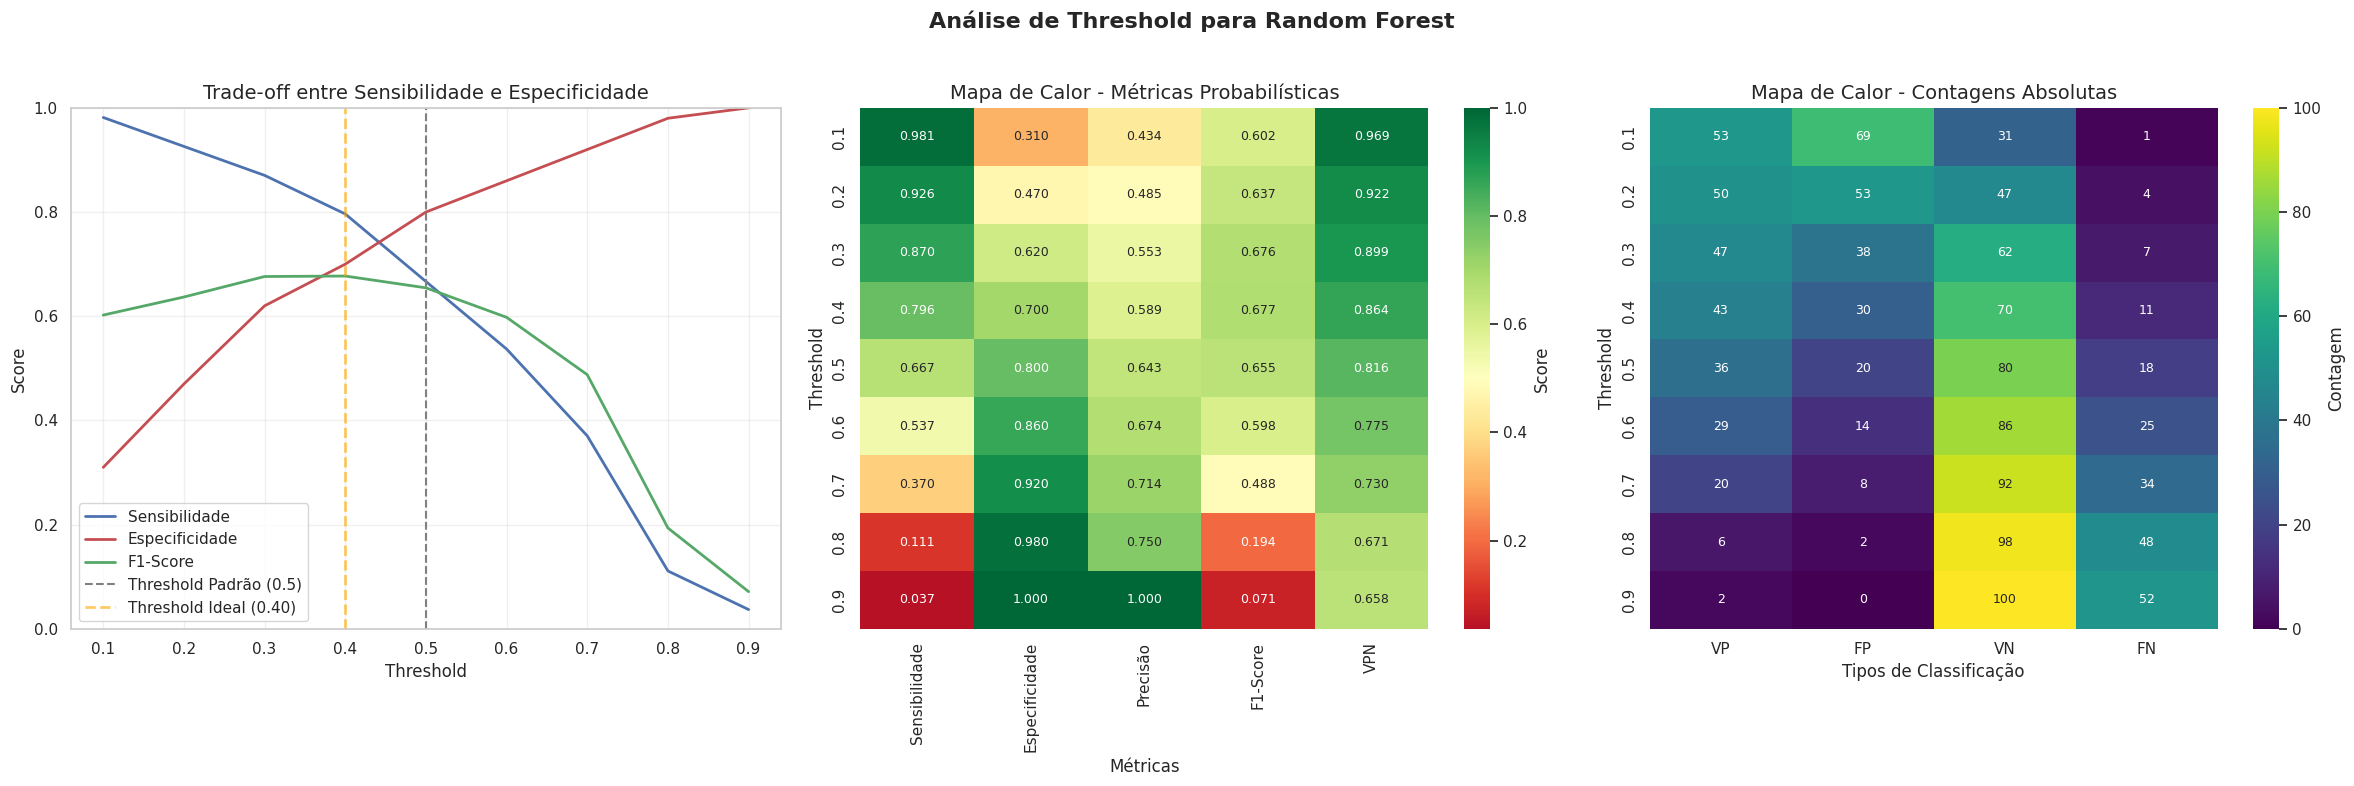


ANÁLISE DO MODELO: Gradient Boosting

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - Gradient Boosting:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     0.907   0.500   0.495   0.641   0.909   49   50   50   5  
   0.20     0.870   0.630   0.560   0.681   0.900   47   37   63   7  
   0.30     0.833   0.690   0.592   0.692   0.885   45   31   69   9  
   0.40     0.796   0.760   0.642   0.711   0.874   43   24   76   11 
   0.50     0.741   0.790   0.656   0.696   0.849   40   21   79   14 
   0.60     0.630   0.860   0.708   0.667   0.811   34   14   86   20 
   0.70     0.463   0.870   0.658   0.543   0.750   25   13   87   29 
   0.80     0.389   0.900   0.677   0.494   0.732   21   10   90   33 
   0.90     0.296   0.960   0.800   0.432   0.716   16   4    96   38 

THRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO (0.40) - Gradient Boost

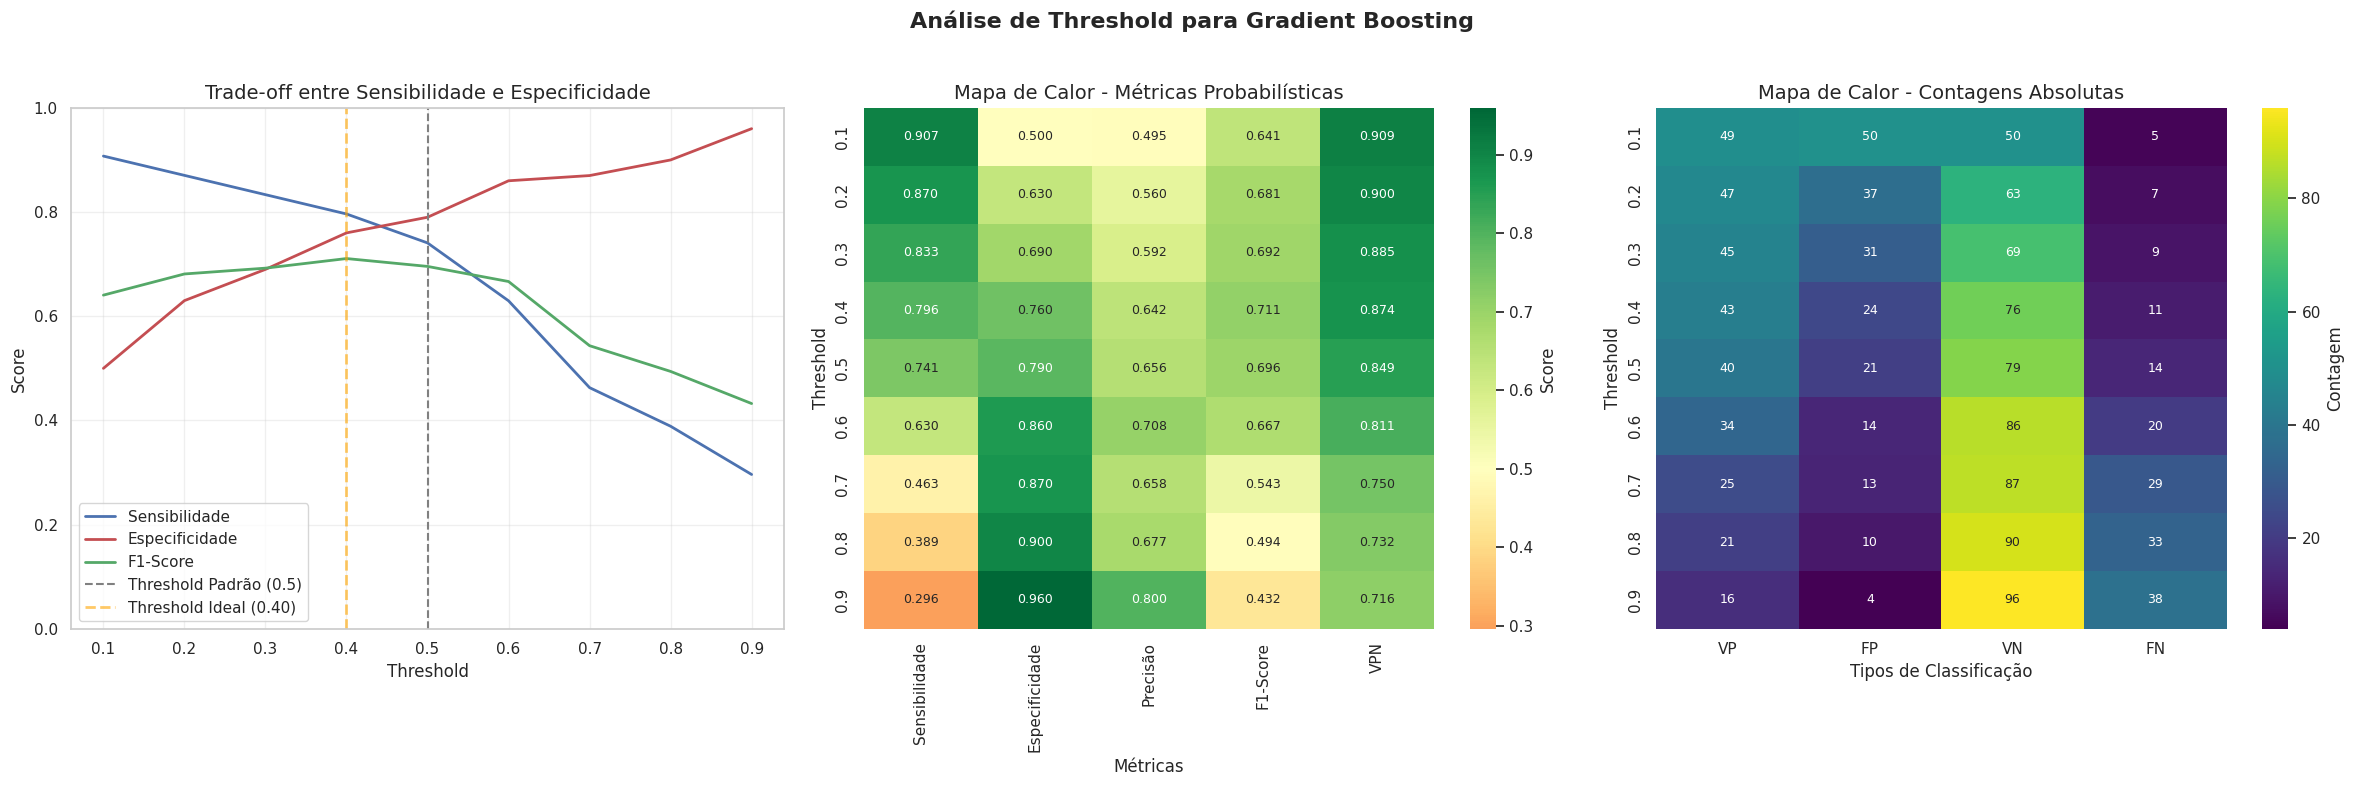


ANÁLISE DO MODELO: AdaBoost

Calculando métricas para 9 valores de threshold...

TABELA COMPLETA DE MÉTRICAS POR THRESHOLD - AdaBoost:
Threshold   Sens    Espec   Prec     F1      VPN    VP   FP   VN   FN 
----------------------------------------------------------------------
   0.10     1.000   0.000   0.351   0.519   0.000   54  100   0    0  
   0.20     1.000   0.000   0.351   0.519   0.000   54  100   0    0  
   0.30     0.981   0.070   0.363   0.530   0.875   53   93   7    1  
   0.40     0.981   0.360   0.453   0.620   0.973   53   64   36   1  
   0.50     0.741   0.760   0.625   0.678   0.844   40   24   76   14 
   0.60     0.259   0.980   0.875   0.400   0.710   14   2    98   40 
   0.70     0.037   1.000   1.000   0.071   0.658   2    0   100   52 
   0.80     0.000   1.000   0.000   0.000   0.649   0    0   100   54 
   0.90     0.000   1.000   0.000   0.000   0.649   0    0   100   54 

THRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO (0.40) - AdaBoost:
- Sensibilidade: 0.981

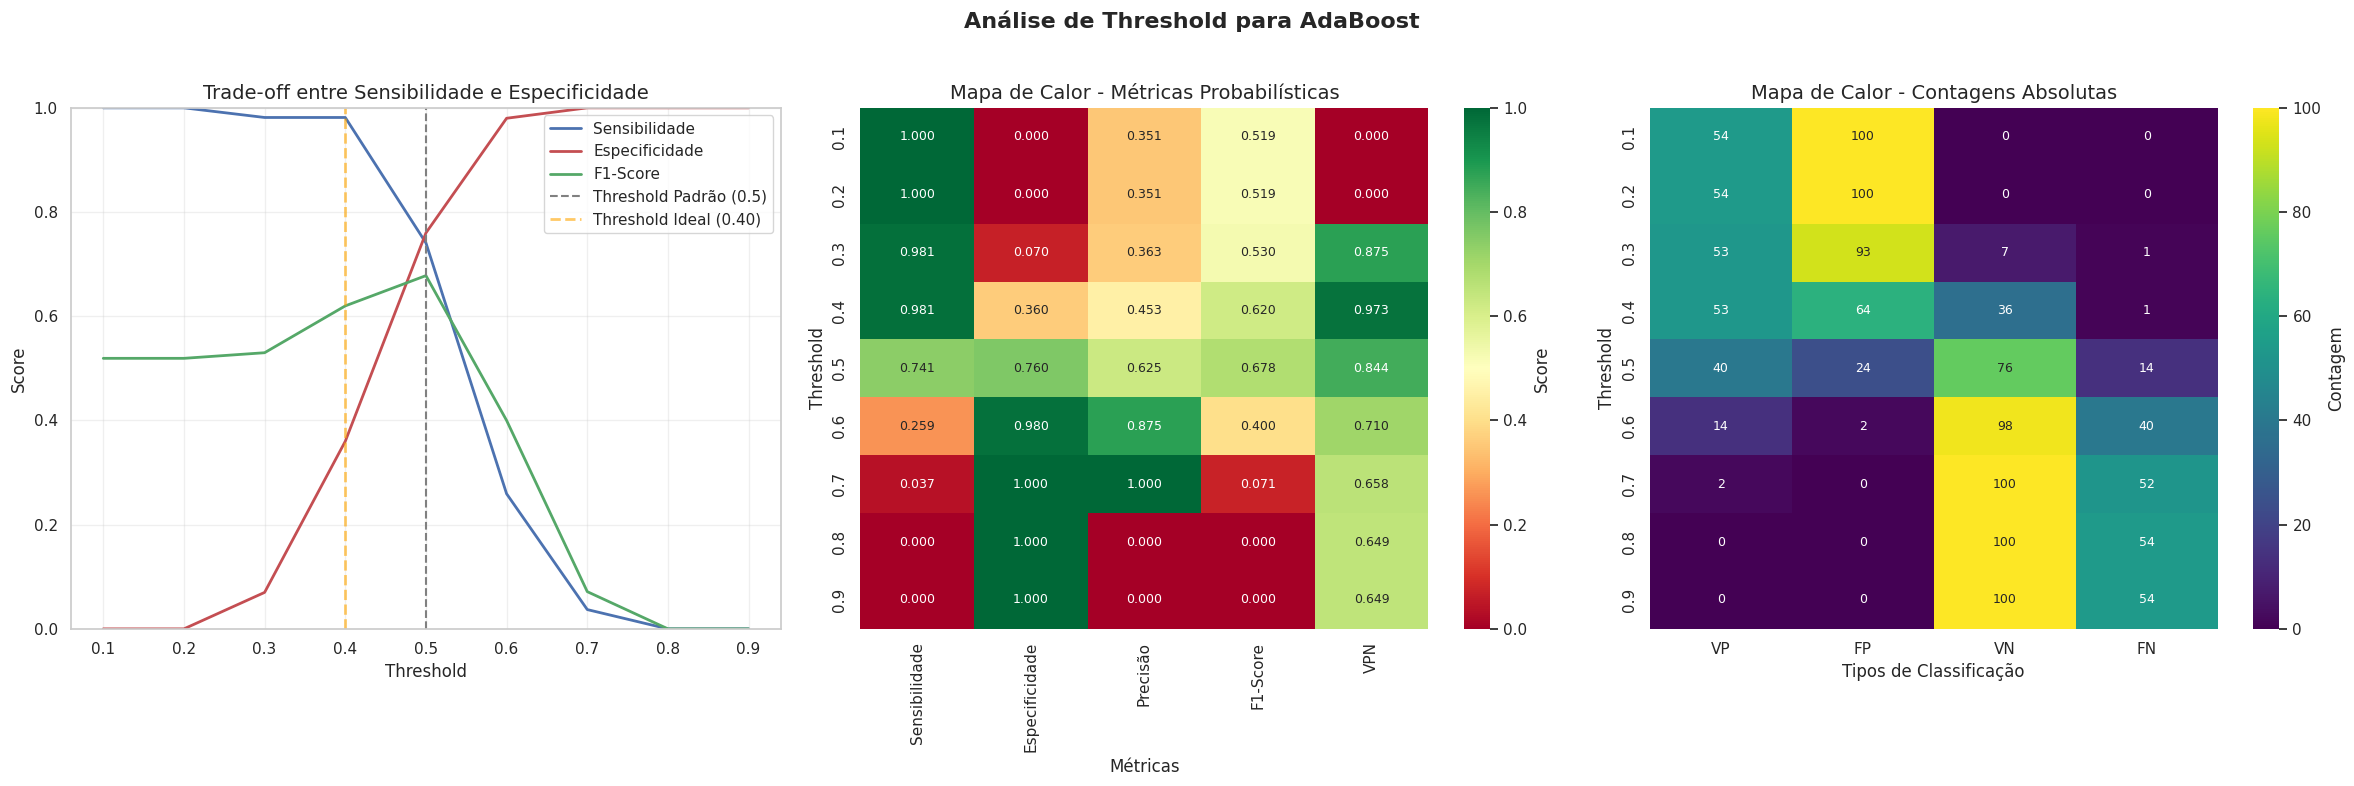


MATRIZES DE CONFUSÃO - THRESHOLD 0.4


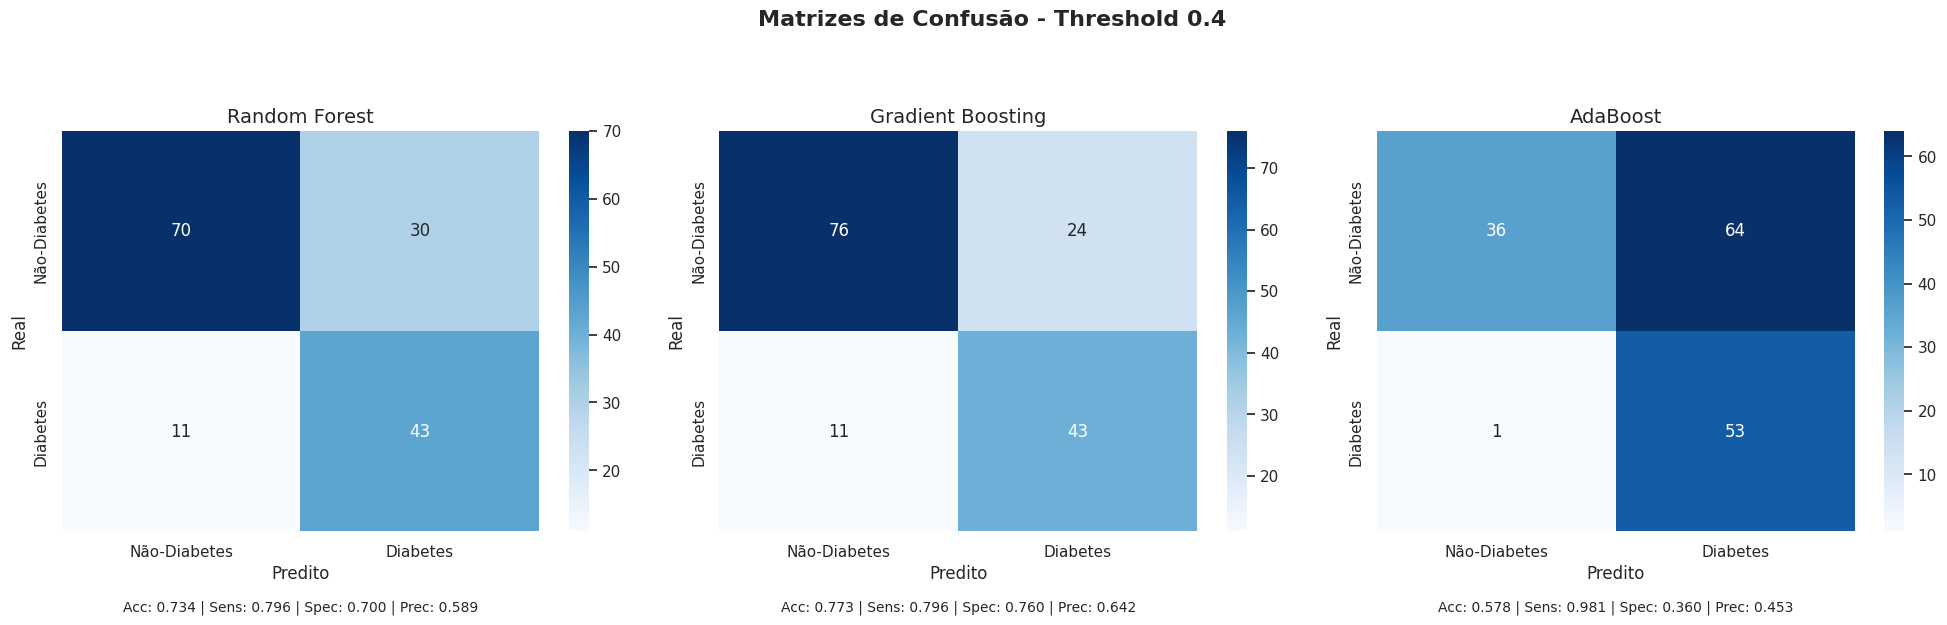


CURVA ROC COMBINADA - TODOS OS MODELOS


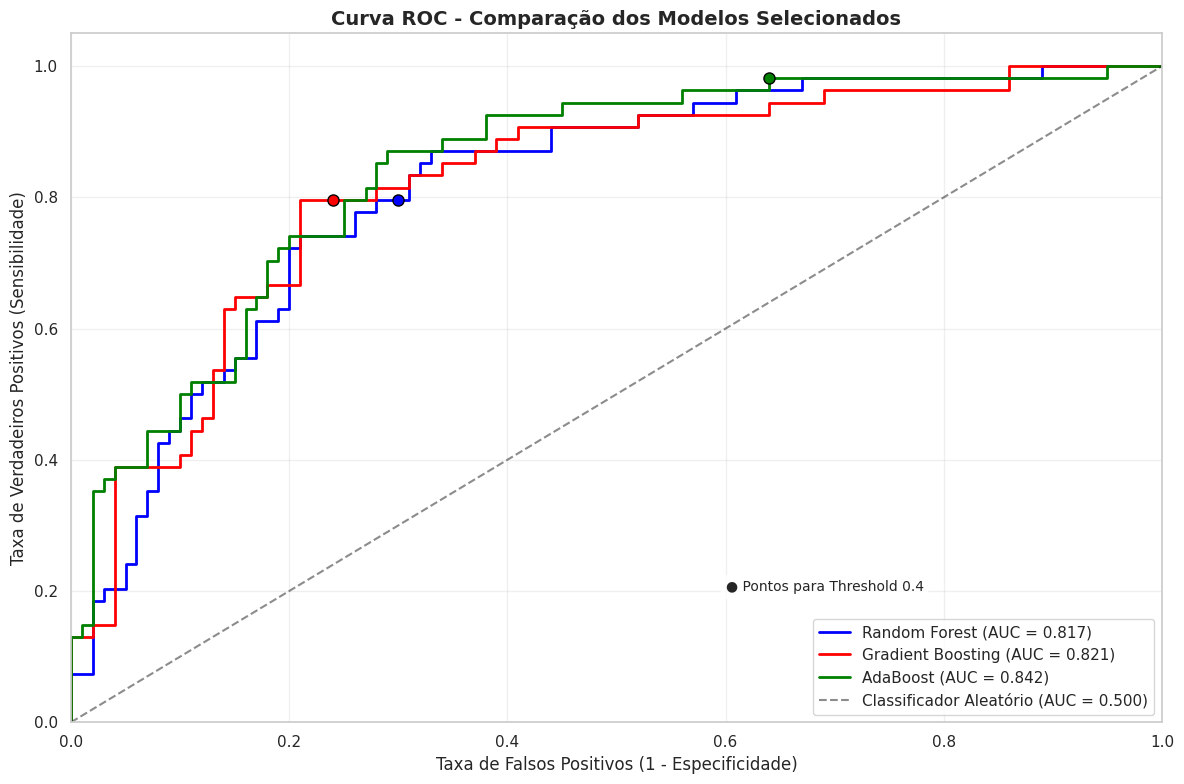


RESUMO COMPARATIVO - THRESHOLD 0.4

Modelo             AUC    Acc    Sens   Spec   Prec   F1     VP  FP  VN  FN 
-------------------------------------------------------------------------------------
Random Forest      0.817  0.734  0.796  0.700  0.589  0.677  43  30  70  11 
Gradient Boosting  0.821  0.773  0.796  0.760  0.642  0.711  43  24  76  11 
AdaBoost           0.842  0.578  0.981  0.360  0.453  0.620  53  64  36  1  

🎯 MELHOR MODELO POR MÉTRICA (Threshold 0.4):
• Melhor AUC: AdaBoost (0.842)
• Melhor F1-Score: Gradient Boosting (0.711)
• Melhor Sensibilidade: AdaBoost (0.981)
• Melhor Especificidade: Gradient Boosting (0.760)


In [28]:
# ===== FUNÇÃO PARA ANÁLISE DE THRESHOLD =====
def analyze_threshold_for_model(model_name, y_proba, y_true, thresholds):
    """
    Analisa diferentes thresholds para um modelo específico
    """
    results = []
    
    for threshold in thresholds:
        # Gerar predições com o threshold atual
        y_pred = (y_proba >= threshold).astype(int)
        
        # Calcular matriz de confusão
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        # Calcular métricas
        sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
        especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
        precisao = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0
        vpn = tn / (tn + fn) if (tn + fn) > 0 else 0  # Valor Preditivo Negativo
        
        results.append({
            'Threshold': threshold,
            'Sensibilidade': sensibilidade,
            'Especificidade': especificidade,
            'Precisão': precisao,
            'F1-Score': f1_score,
            'VPN': vpn,
            'VP': tp,
            'FP': fp,
            'VN': tn,
            'FN': fn
        })
    
    return pd.DataFrame(results)

# ===== ANÁLISE DE THRESHOLD PARA RANDOM FOREST, GRADIENT BOOSTING E ADABOOST =====

print("\n" + "="*70)
print("ANÁLISE DE THRESHOLD - RANDOM FOREST, GRADIENT BOOSTING E ADABOOST")
print("="*70)

# Modelos específicos para análise
target_models = ['Random Forest', 'Gradient Boosting', 'AdaBoost']
print(f"\nAnalisando os modelos: {target_models}")

# Definir diferentes thresholds para análise (0.10 em 0.10)
# Round thresholds to 2 decimal places to avoid floating point inaccuracies
thresholds = np.round(np.arange(0.1, 1.0, 0.10), 2)

# Threshold para diagnóstico clínico (0.4)
diag_threshold = 0.4

# Dicionário para armazenar matrizes de confusão
confusion_matrices = {}
roc_data = {}

# Analisar cada modelo individualmente
for model_name in target_models:
    print(f"\n{'='*50}")
    print(f"ANÁLISE DO MODELO: {model_name}")
    print(f"{'='*50}")
    
    # Obter probabilidades preditas no conjunto de teste
    y_proba = model_scores[model_name]['y_test_proba']
    
    # Calcular métricas para cada threshold
    print(f"\nCalculando métricas para {len(thresholds)} valores de threshold...")
    threshold_df = analyze_threshold_for_model(model_name, y_proba, y_test, thresholds)
    
    # Formatar os dados da tabela para exibição com 3 casas decimais nas métricas
    threshold_display = threshold_df.copy()
    threshold_display['Threshold'] = threshold_display['Threshold'].round(3) 
    threshold_display['Sensibilidade'] = threshold_display['Sensibilidade'].round(3)
    threshold_display['Especificidade'] = threshold_display['Especificidade'].round(3)
    threshold_display['Precisão'] = threshold_display['Precisão'].round(3)
    threshold_display['F1-Score'] = threshold_display['F1-Score'].round(3)
    threshold_display['VPN'] = threshold_display['VPN'].round(3)
    
    # Exibir tabela completa de métricas por threshold com números centralizados
    print(f"\nTABELA COMPLETA DE MÉTRICAS POR THRESHOLD - {model_name}:")
    
    # Criar string formatada com colunas centralizadas
    header = f"{'Threshold':^10} {'Sens':^7} {'Espec':^7} {'Prec':^7} {'F1':^7} {'VPN':^7} {'VP':^4} {'FP':^4} {'VN':^4} {'FN':^4}"
    print(header)
    print("-" * len(header))
    
    for _, row in threshold_display.iterrows():
        linha = f"{row['Threshold']:^10.2f} {row['Sensibilidade']:^7.3f} {row['Especificidade']:^7.3f} {row['Precisão']:^7.3f} {row['F1-Score']:^7.3f} {row['VPN']:^7.3f} {row['VP']:^4.0f} {row['FP']:^4.0f} {row['VN']:^4.0f} {row['FN']:^4.0f}"
        print(linha)
    
    # Encontrar threshold ótimo para diagnóstico clínico (0.4)
    if diag_threshold not in threshold_df['Threshold'].values:
        diag_idx = abs(threshold_df['Threshold'] - diag_threshold).idxmin()
    else:
        diag_idx = threshold_df[threshold_df['Threshold'] == diag_threshold].index[0]
    diag = threshold_df.iloc[diag_idx]
    
    print(f"\nTHRESHOLD IDEAL PARA DIAGNÓSTICO CLÍNICO ({diag_threshold:.2f}) - {model_name}:")
    print(f"- Sensibilidade: {diag['Sensibilidade']:.3f}")
    print(f"- Especificidade: {diag['Especificidade']:.3f}")
    print(f"- F1-Score: {diag['F1-Score']:.3f}")
    print(f"- Precisão: {diag['Precisão']:.3f}")
    
    # NOVA SEÇÃO: TABELA DE INTERPRETAÇÃO CLÍNICA
    print(f"\n{'='*60}")
    print(f"INTERPRETAÇÃO CLÍNICA DETALHADA - {model_name} (Threshold {diag_threshold:.2f})")
    print(f"{'='*60}")
    
    # Extrair valores para interpretação
    VP = int(diag['VP'])
    FN = int(diag['FN']) 
    VN = int(diag['VN'])
    FP = int(diag['FP'])
    total_diabeticos = VP + FN
    total_nao_diabeticos = VN + FP
    total_pred_positivas = VP + FP
    
    # Tabela de interpretação clínica
    print(f"\n📊 RESUMO DE PERFORMANCE:")
    print(f"Sensibilidade: {diag['Sensibilidade']*100:.1f}% - {VP} de {total_diabeticos} diabéticos detectados")
    print(f"Especificidade: {diag['Especificidade']*100:.1f}% - {VN} de {total_nao_diabeticos} não-diabéticos corretos")
    print(f"Precisão: {diag['Precisão']*100:.1f}% - {VP} de {total_pred_positivas} predições positivas corretas")
    print(f"F1-Score: {diag['F1-Score']:.3f} - Equilíbrio geral")
    
    print(f"\n📋 INTERPRETAÇÃO CLÍNICA:")
    print(f"✅ Casos de diabetes detectados: {VP}")
    print(f"❌ Casos de diabetes perdidos: {FN}")
    if FN > 0:
        print(f"⚠️  {FN} pacientes diabéticos não seriam identificados")
    else:
        print(f"🎯 Todos os pacientes diabéticos foram identificados!")
    
    print(f"\n🔍 ANÁLISE DE ERROS:")
    print(f"• Falsos Positivos (FP): {FP} - Pacientes saudáveis incorretamente diagnosticados")
    print(f"• Falsos Negativos (FN): {FN} - Pacientes diabéticos não detectados")
    
    # Calcular percentuais de erro
    if total_nao_diabeticos > 0:
        perc_fp = (FP / total_nao_diabeticos) * 100
        print(f"• Taxa de Falsos Positivos: {perc_fp:.1f}% dos não-diabéticos")
    
    if total_diabeticos > 0:
        perc_fn = (FN / total_diabeticos) * 100
        print(f"• Taxa de Falsos Negativos: {perc_fn:.1f}% dos diabéticos")
    
    # Gerar predições com threshold 0.4 e calcular matriz de confusão
    y_pred_04 = (y_proba >= diag_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_04)
    confusion_matrices[model_name] = cm
    
    # Calcular dados ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
    # Criar figura individual para este modelo
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
    fig.suptitle(f'Análise de Threshold para {model_name}', fontsize=16, fontweight='bold')
    
    # Gráfico 1: Curvas de Sensibilidade e Especificidade
    ax1.plot(threshold_df['Threshold'], threshold_df['Sensibilidade'], 'b-', linewidth=2, label='Sensibilidade')
    ax1.plot(threshold_df['Threshold'], threshold_df['Especificidade'], 'r-', linewidth=2, label='Especificidade')
    ax1.plot(threshold_df['Threshold'], threshold_df['F1-Score'], 'g-', linewidth=2, label='F1-Score')
    ax1.axvline(x=0.5, color='gray', linestyle='--', label='Threshold Padrão (0.5)')
    ax1.axvline(x=diag_threshold, color='orange', linestyle='--', linewidth=2, label=f'Threshold Ideal ({diag_threshold:.2f})', alpha=0.6)
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Score')
    ax1.set_title('Trade-off entre Sensibilidade e Especificidade', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(0, 1)
    ax1.set_xticks(thresholds) 
    
    # Gráfico 2: Heat map de métricas probabilísticas
    metrics_prob = threshold_df[['Threshold', 'Sensibilidade', 'Especificidade', 'Precisão', 'F1-Score', 'VPN']].copy()
    
    sns.heatmap(metrics_prob.set_index('Threshold'), annot=True, cmap='RdYlGn', center=0.5, 
               ax=ax2, cbar_kws={'label': 'Score'}, fmt='.3f', 
               annot_kws={'size': 9})
    ax2.set_title('Mapa de Calor - Métricas Probabilísticas', fontsize=14)
    ax2.set_xlabel('Métricas')
    ax2.set_ylabel('Threshold')
    
    # Gráfico 3: Heat map de contagens absolutas
    metrics_counts = threshold_df[['Threshold', 'VP', 'FP', 'VN', 'FN']].copy()
    
    sns.heatmap(metrics_counts.set_index('Threshold'), annot=True, cmap='viridis', 
               ax=ax3, cbar_kws={'label': 'Contagem'}, fmt='.0f',
               annot_kws={'size': 9})
    ax3.set_title('Mapa de Calor - Contagens Absolutas', fontsize=14)
    ax3.set_xlabel('Tipos de Classificação')
    ax3.set_ylabel('Threshold')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ===== MATRIZES DE CONFUSÃO PARA THRESHOLD 0.4 =====
print(f"\n{'='*80}")
print("MATRIZES DE CONFUSÃO - THRESHOLD 0.4")
print(f"{'='*80}")

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle(f'Matrizes de Confusão - Threshold {diag_threshold:.1f}', fontsize=16, fontweight='bold')

for i, model_name in enumerate(target_models):
    cm = confusion_matrices[model_name]
    
    # Criar heatmap da matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Não-Diabetes', 'Diabetes'],
                yticklabels=['Não-Diabetes', 'Diabetes'],
                ax=axes[i])
    
    axes[i].set_title(f'{model_name}', fontsize=14)
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')
    
    # Adicionar métricas na matriz
    tn, fp, fn, tp = cm.ravel()
    total = cm.sum()
    accuracy = (tp + tn) / total
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Adicionar texto com métricas
    axes[i].text(0.5, -0.20, 
                f'Acc: {accuracy:.3f} | Sens: {sensitivity:.3f} | Spec: {specificity:.3f} | Prec: {precision:.3f}',
                transform=axes[i].transAxes, ha='center', fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()

# ===== CURVA ROC COMBINADA =====
print(f"\n{'='*80}")
print("CURVA ROC COMBINADA - TODOS OS MODELOS")
print(f"{'='*80}")

plt.figure(figsize=(12, 8))

# Cores para cada modelo
colors = ['blue', 'red', 'green']

for i, model_name in enumerate(target_models):
    fpr = roc_data[model_name]['fpr']
    tpr = roc_data[model_name]['tpr']
    roc_auc = roc_data[model_name]['auc']
    
    plt.plot(fpr, tpr, color=colors[i], linewidth=2, 
             label=f'{model_name} (AUC = {roc_auc:.3f})')

# Linha diagonal (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Classificador Aleatório (AUC = 0.500)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
plt.title('Curva ROC - Comparação dos Modelos Selecionados', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)

# Adicionar ponto para threshold 0.4 em cada curva
for i, model_name in enumerate(target_models):
    y_proba = model_scores[model_name]['y_test_proba']
    y_pred_04 = (y_proba >= diag_threshold).astype(int)
    
    # Calcular FPR e TPR para threshold 0.4
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_04).ravel()
    fpr_04 = fp / (fp + tn) if (fp + tn) > 0 else 0
    tpr_04 = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    plt.plot(fpr_04, tpr_04, 'o', color=colors[i], markersize=8, 
             markeredgecolor='black', markeredgewidth=1)

# Adicionar legenda para os pontos de threshold 0.4
plt.text(0.6, 0.2, f'● Pontos para Threshold {diag_threshold:.1f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# ===== RESUMO FINAL =====
print(f"\n{'='*80}")
print("RESUMO COMPARATIVO - THRESHOLD 0.4")
print(f"{'='*80}")

# Criar tabela resumo
summary_data = []
for model_name in target_models:
    cm = confusion_matrices[model_name]
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    auc_score = roc_data[model_name]['auc']
    
    summary_data.append({
        'Modelo': model_name,
        'AUC': auc_score,
        'Accuracy': accuracy,
        'Sensibilidade': sensitivity,
        'Especificidade': specificity,
        'Precisão': precision,
        'F1-Score': f1_score,
        'VP': tp,
        'FP': fp,
        'VN': tn,
        'FN': fn
    })

# Exibir tabela formatada
print(f"\n{'Modelo':<18} {'AUC':<6} {'Acc':<6} {'Sens':<6} {'Spec':<6} {'Prec':<6} {'F1':<6} {'VP':<3} {'FP':<3} {'VN':<3} {'FN':<3}")
print("-" * 85)

for data in summary_data:
    print(f"{data['Modelo']:<18} {data['AUC']:<6.3f} {data['Accuracy']:<6.3f} {data['Sensibilidade']:<6.3f} {data['Especificidade']:<6.3f} {data['Precisão']:<6.3f} {data['F1-Score']:<6.3f} {data['VP']:<3} {data['FP']:<3} {data['VN']:<3} {data['FN']:<3}")

print(f"\n🎯 MELHOR MODELO POR MÉTRICA (Threshold {diag_threshold:.1f}):")
best_auc = max(summary_data, key=lambda x: x['AUC'])
best_f1 = max(summary_data, key=lambda x: x['F1-Score'])
best_sens = max(summary_data, key=lambda x: x['Sensibilidade'])
best_spec = max(summary_data, key=lambda x: x['Especificidade'])

print(f"• Melhor AUC: {best_auc['Modelo']} ({best_auc['AUC']:.3f})")
print(f"• Melhor F1-Score: {best_f1['Modelo']} ({best_f1['F1-Score']:.3f})")
print(f"• Melhor Sensibilidade: {best_sens['Modelo']} ({best_sens['Sensibilidade']:.3f})")
print(f"• Melhor Especificidade: {best_spec['Modelo']} ({best_spec['Especificidade']:.3f})")


# 🔬 **ANÁLISE COMPARATIVA METODOLÓGICA DOS MELHORES MODELOS**

## 📊 **Metodologia de Comparação**

### **1. Seleção dos Top 3 Modelos por Técnica de Balanceamento**
- **Critério Principal**: AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
- **Critério Secundário**: Recall (Sensibilidade) - crucial para diagnóstico médico
- **Critério Terciário**: F1-Score - equilíbrio entre precisão e recall

### **2. Métricas de Avaliação**
- **AUC-ROC**: Capacidade de discriminação entre classes
- **Recall (Sensibilidade)**: Taxa de detecção de casos positivos (diabéticos)
- **Especificidade**: Taxa de identificação correta de casos negativos
- **Precisão**: Proporção de predições positivas corretas
- **F1-Score**: Média harmônica entre precisão e recall

### **3. Avaliação de Overfitting**
- **Comparação Train vs Test**: Diferença nas métricas de treino e teste
- **Análise de Complexidade**: Capacidade dos modelos vs tamanho do dataset
- **Validação Cruzada**: Estabilidade das métricas
- **Predições em Perfis Reais**: Comportamento em cenários clínicos específicos

In [68]:
# ===== CARREGAMENTO DOS MODELOS SALVOS =====

import pickle
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

print("🔄 CARREGANDO MODELOS SALVOS DOS DIFERENTES MÉTODOS DE BALANCEAMENTO")
print("="*80)

# Função para carregar modelos e dados de teste
def load_models_and_data(method_type):
    """
    Carrega modelos salvos e dados de teste para cada método de balanceamento
    """
    models = {}
    
    # Definir diretórios e modelos disponíveis
    if method_type == 'smote':
        directory = 'modelos-smote'
        available_models = [
            'random_forest', 'xgboost', 'lightgbm', 'logistic_regression',
            'gradient_boosting', 'adaboost', 'decision_tree', 'svm', 'knn', 'naive_bayes'
        ]
    elif method_type == 'upsampling':
        directory = 'modelos-upsampling'
        available_models = [
            'random_forest', 'xgboost', 'lightgbm', 'logistic_regression',
            'gradient_boosting', 'adaboost', 'decision_tree', 'svm', 'knn', 'naive_bayes'
        ]
    elif method_type == 'reponderacao':
        directory = 'modelos-reponderação'
        available_models = [
            'random_forest', 'xgboost', 'lightgbm', 'logistic_regression',
            'decision_tree', 'svm'
        ]
    
    # Carregar modelos
    for model_name in available_models:
        model_file = f'{directory}/{model_name}_model.pkl'
        try:
            if os.path.exists(model_file):
                models[model_name] = joblib.load(model_file)
                print(f"✅ {model_name.replace('_', ' ').title()} carregado de {method_type}")
            else:
                print(f"⚠️ Arquivo não encontrado: {model_file}")
        except Exception as e:
            print(f"❌ Erro ao carregar {model_name} de {method_type}: {str(e)}")
    
    return models

# Carregar modelos de cada método
print("\n📦 CARREGANDO MODELOS SMOTE:")
smote_models = load_models_and_data('smote')

print("\n📦 CARREGANDO MODELOS UPSAMPLING:")
upsampling_models = load_models_and_data('upsampling')

print("\n📦 CARREGANDO MODELOS REPONDERAÇÃO:")
reponderacao_models = load_models_and_data('reponderacao')

print(f"\n📊 RESUMO DE MODELOS CARREGADOS:")
print(f"SMOTE: {len(smote_models)} modelos")
print(f"Upsampling: {len(upsampling_models)} modelos")
print(f"Reponderação: {len(reponderacao_models)} modelos")
print(f"Total: {len(smote_models) + len(upsampling_models) + len(reponderacao_models)} modelos")

🔄 CARREGANDO MODELOS SALVOS DOS DIFERENTES MÉTODOS DE BALANCEAMENTO

📦 CARREGANDO MODELOS SMOTE:
✅ Random Forest carregado de smote
✅ Xgboost carregado de smote
✅ Lightgbm carregado de smote
✅ Logistic Regression carregado de smote
✅ Gradient Boosting carregado de smote
✅ Adaboost carregado de smote
✅ Decision Tree carregado de smote
✅ Svm carregado de smote
✅ Knn carregado de smote
✅ Naive Bayes carregado de smote

📦 CARREGANDO MODELOS UPSAMPLING:
✅ Random Forest carregado de upsampling
✅ Xgboost carregado de upsampling
✅ Lightgbm carregado de upsampling
✅ Logistic Regression carregado de upsampling
✅ Gradient Boosting carregado de upsampling
✅ Adaboost carregado de upsampling
✅ Decision Tree carregado de upsampling
✅ Svm carregado de upsampling
✅ Knn carregado de upsampling
✅ Naive Bayes carregado de upsampling

📦 CARREGANDO MODELOS REPONDERAÇÃO:
✅ Random Forest carregado de reponderacao
✅ Xgboost carregado de reponderacao
✅ Lightgbm carregado de reponderacao
✅ Logistic Regression ca

In [69]:
# ===== PREPARAÇÃO DOS DADOS DE TESTE =====

# Verificar se temos os dados de teste do contexto anterior
try:
    # Usar os dados de teste que já foram definidos anteriormente
    print(f"✅ Dados de teste disponíveis: X_test({X_test.shape}), y_test({len(y_test)})")
    
    # Verificar se existe scaler salvo
    scaler_path = 'modelos-smote/scaler.pkl'
    if os.path.exists(scaler_path):
        scaler = joblib.load(scaler_path)
        X_test_scaled = scaler.transform(X_test)
        print(f"✅ Scaler carregado e dados de teste normalizados")
    else:
        # Usar StandardScaler se não houver scaler salvo
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        # Ajustar com dados de treino (simulação)
        X_test_scaled = X_test.copy()  # Para modelos que não precisam de normalização
        print(f"⚠️ Usando dados sem normalização (scaler não encontrado)")
        
except NameError:
    print("❌ Dados de teste não encontrados. Execute as células anteriores primeiro.")
    # Carregar dados originais como fallback
    df = pd.read_csv('diabetes.csv')
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    X_test_scaled = X_test.copy()
    print(f"✅ Dados recarregados: X_test({X_test.shape}), y_test({len(y_test)})")

# ===== DEFINIÇÃO DOS PERFIS DE ANÁLISE =====

# Perfis do mundo real para análise
perfis_analise = {
    'Diabético_Severo': {
        'Pregnancies': 4,
        'Glucose': 200,  # Muito alto - diabetes severo
        'BloodPressure': 100,  # Hipertensão severa
        'SkinThickness': 50,  # Muito elevado
        'Insulin': 200,  # Alto
        'BMI': 40.0,  # Obesidade mórbida
        'DiabetesPedigreeFunction': 1.5,  # Histórico muito forte
        'Age': 65  # Idade avançada
    },
    'Diabético_Moderado': {
        'Pregnancies': 2,
        'Glucose': 160,  # Alto mas controlável
        'BloodPressure': 85,  # Elevado
        'SkinThickness': 35,  # Elevado
        'Insulin': 150,  # Moderadamente alto
        'BMI': 32.0,  # Obesidade grau I
        'DiabetesPedigreeFunction': 0.8,  # Alto histórico
        'Age': 50
    },
    'Pré_Diabético_Alto': {
        'Pregnancies': 4,
        'Glucose': 124,  # Limite pré-diabetes
        'BloodPressure': 78,  # Normal alto
        'SkinThickness': 30,  # Moderado
        'Insulin': 120,  # Moderado
        'BMI': 31.0,  # Obesidade grau I
        'DiabetesPedigreeFunction': 0.6,  # Moderado alto
        'Age': 45
    },
    'Pré_Diabético_Baixo': {
        'Pregnancies': 2,
        'Glucose': 115,  # Pré-diabetes baixo
        'BloodPressure': 75,  # Normal
        'SkinThickness': 25,  # Normal
        'Insulin': 100,  # Normal alto
        'BMI': 30.0,  # Obesidade leve
        'DiabetesPedigreeFunction': 0.4,  # Moderado
        'Age': 40
    },
    'Risco_Baixo': {
        'Pregnancies': 0,
        'Glucose': 99,  # Normal alto
        'BloodPressure': 70,  # Normal
        'SkinThickness': 22,  # Normal
        'Insulin': 80,  # Normal
        'BMI': 29.0,  # Sobrepeso alto
        'DiabetesPedigreeFunction': 0.3,  # Baixo moderado
        'Age': 35
    },
    'Saudável': {
        'Pregnancies': 0,
        'Glucose': 85,  # Normal
        'BloodPressure': 65,  # Normal
        'SkinThickness': 18,  # Normal
        'Insulin': 60,  # Normal
        'BMI': 22.0,  # Normal
        'DiabetesPedigreeFunction': 0.15,  # Muito baixo
        'Age': 25
    }
}

# Converter perfis para DataFrame
perfis_df = pd.DataFrame(perfis_analise).T
print(f"\n📋 PERFIS DE ANÁLISE DEFINIDOS:")
print(f"Número de perfis: {len(perfis_analise)}")
print(f"Features por perfil: {len(list(perfis_analise.values())[0])}")
print("\nPerfis:")
for perfil in perfis_analise.keys():
    print(f"  • {perfil}")

print("\n✅ Dados preparados para análise comparativa!")

✅ Dados de teste disponíveis: X_test((154, 8)), y_test(154)
✅ Scaler carregado e dados de teste normalizados

📋 PERFIS DE ANÁLISE DEFINIDOS:
Número de perfis: 6
Features por perfil: 8

Perfis:
  • Diabético_Severo
  • Diabético_Moderado
  • Pré_Diabético_Alto
  • Pré_Diabético_Baixo
  • Risco_Baixo
  • Saudável

✅ Dados preparados para análise comparativa!


/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
# ===== AVALIAÇÃO DE PERFORMANCE DOS MODELOS =====

print("🔍 AVALIANDO PERFORMANCE DE TODOS OS MODELOS")
print("="*80)

def evaluate_model_performance(model, X_test, y_test, model_name, method_type):
    """
    Avalia a performance de um modelo específico
    """
    try:
        # Fazer predições
        y_pred = model.predict(X_test)
        
        # Verificar se o modelo tem predict_proba
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            # Para SVM
            decision_scores = model.decision_function(X_test)
            # Converter para probabilidades usando sigmoid
            y_proba = 1 / (1 + np.exp(-decision_scores))
        else:
            # Fallback: usar as predições binárias
            y_proba = y_pred.astype(float)
        
        # Calcular métricas
        auc_score = roc_auc_score(y_test, y_proba)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calcular especificidade
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        return {
            'model_name': model_name,
            'method_type': method_type,
            'auc': auc_score,
            'recall': recall,
            'precision': precision,
            'f1_score': f1,
            'accuracy': accuracy,
            'specificity': specificity,
            'y_proba': y_proba,
            'y_pred': y_pred
        }
    
    except Exception as e:
        print(f"❌ Erro ao avaliar {model_name} ({method_type}): {str(e)}")
        return None

# Avaliar todos os modelos
all_results = []

# Avaliar modelos SMOTE
print("\n📊 Avaliando modelos SMOTE:")
for model_name, model in smote_models.items():
    result = evaluate_model_performance(model, X_test_scaled, y_test, model_name, 'SMOTE')
    if result:
        all_results.append(result)
        print(f"✅ {model_name}: AUC={result['auc']:.3f}, Recall={result['recall']:.3f}")

# Avaliar modelos Upsampling
print("\n📊 Avaliando modelos Upsampling:")
for model_name, model in upsampling_models.items():
    result = evaluate_model_performance(model, X_test_scaled, y_test, model_name, 'Upsampling')
    if result:
        all_results.append(result)
        print(f"✅ {model_name}: AUC={result['auc']:.3f}, Recall={result['recall']:.3f}")

# Avaliar modelos Reponderação
print("\n📊 Avaliando modelos Reponderação:")
for model_name, model in reponderacao_models.items():
    result = evaluate_model_performance(model, X_test_scaled, y_test, model_name, 'Reponderação')
    if result:
        all_results.append(result)
        print(f"✅ {model_name}: AUC={result['auc']:.3f}, Recall={result['recall']:.3f}")

print(f"\n📈 TOTAL DE MODELOS AVALIADOS: {len(all_results)}")

# Converter para DataFrame para análise
results_df = pd.DataFrame(all_results)
print(f"\n📋 RESUMO GERAL (Top 5 por AUC):")
print(results_df.nlargest(5, 'auc')[['model_name', 'method_type', 'auc', 'recall', 'f1_score']].round(3))

print("\n✅ Avaliação de performance concluída!")

🔍 AVALIANDO PERFORMANCE DE TODOS OS MODELOS

📊 Avaliando modelos SMOTE:
✅ random_forest: AUC=0.613, Recall=0.000
✅ xgboost: AUC=0.591, Recall=0.000
✅ lightgbm: AUC=0.627, Recall=0.000
✅ logistic_regression: AUC=0.645, Recall=0.019
✅ gradient_boosting: AUC=0.600, Recall=0.000
✅ adaboost: AUC=0.492, Recall=0.000
✅ decision_tree: AUC=0.587, Recall=0.315
✅ svm: AUC=0.439, Recall=0.000
✅ knn: AUC=0.504, Recall=0.000
✅ naive_bayes: AUC=0.572, Recall=0.019

📊 Avaliando modelos Upsampling:
✅ random_forest: AUC=0.577, Recall=0.000
✅ xgboost: AUC=0.585, Recall=0.000
✅ lightgbm: AUC=0.581, Recall=0.000
✅ logistic_regression: AUC=0.647, Recall=0.019
✅ gradient_boosting: AUC=0.514, Recall=0.000


/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not ha

✅ adaboost: AUC=0.464, Recall=0.000
✅ decision_tree: AUC=0.500, Recall=0.000
✅ svm: AUC=0.449, Recall=0.000
✅ knn: AUC=0.500, Recall=0.000
✅ naive_bayes: AUC=0.531, Recall=0.167

📊 Avaliando modelos Reponderação:
✅ random_forest: AUC=0.511, Recall=0.000
✅ xgboost: AUC=0.624, Recall=0.000
✅ lightgbm: AUC=0.573, Recall=0.000
✅ logistic_regression: AUC=0.646, Recall=0.019
✅ decision_tree: AUC=0.500, Recall=0.000
✅ svm: AUC=0.440, Recall=1.000

📈 TOTAL DE MODELOS AVALIADOS: 26

📋 RESUMO GERAL (Top 5 por AUC):
             model_name   method_type    auc  recall  f1_score
13  logistic_regression    Upsampling  0.647   0.019     0.036
23  logistic_regression  Reponderação  0.646   0.019     0.036
3   logistic_regression         SMOTE  0.645   0.019     0.036
2              lightgbm         SMOTE  0.627   0.000     0.000
21              xgboost  Reponderação  0.624   0.000     0.000

✅ Avaliação de performance concluída!


/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/hom

In [50]:
# ===== SELEÇÃO DOS TOP 3 MODELOS POR MÉTODO =====

print("🏆 SELECIONANDO OS TOP 3 MODELOS DE CADA MÉTODO DE BALANCEAMENTO")
print("="*80)

# Função para selecionar top 3 por método
def get_top3_by_method(results_df, method_type, primary_metric='auc', secondary_metric='recall'):
    """
    Seleciona os top 3 modelos de um método específico
    """
    method_results = results_df[results_df['method_type'] == method_type].copy()
    
    # Ordenar por métrica primária (AUC) e depois secundária (Recall)
    method_results = method_results.sort_values(
        [primary_metric, secondary_metric], 
        ascending=[False, False]
    )
    
    return method_results.head(3)

# Selecionar top 3 de cada método
top3_smote = get_top3_by_method(results_df, 'SMOTE')
top3_upsampling = get_top3_by_method(results_df, 'Upsampling')
top3_reponderacao = get_top3_by_method(results_df, 'Reponderação')

# Combinar todos os top 3
top3_all = pd.concat([top3_smote, top3_upsampling, top3_reponderacao], ignore_index=True)

# Exibir resultados
print("\n🥇 TOP 3 MODELOS - SMOTE:")
print("-" * 60)
for idx, row in top3_smote.iterrows():
    print(f"{row.name + 1}º {row['model_name'].replace('_', ' ').title():<25} AUC: {row['auc']:.3f} | Recall: {row['recall']:.3f} | F1: {row['f1_score']:.3f}")

print("\n🥈 TOP 3 MODELOS - UPSAMPLING:")
print("-" * 60)
for idx, row in top3_upsampling.iterrows():
    print(f"{row.name + 1}º {row['model_name'].replace('_', ' ').title():<25} AUC: {row['auc']:.3f} | Recall: {row['recall']:.3f} | F1: {row['f1_score']:.3f}")

print("\n🥉 TOP 3 MODELOS - REPONDERAÇÃO:")
print("-" * 60)
for idx, row in top3_reponderacao.iterrows():
    print(f"{row.name + 1}º {row['model_name'].replace('_', ' ').title():<25} AUC: {row['auc']:.3f} | Recall: {row['recall']:.3f} | F1: {row['f1_score']:.3f}")

# Criar tabela comparativa dos top 3 de cada método
print("\n📊 TABELA COMPARATIVA - TOP 3 DE CADA MÉTODO:")
print("="*100)
print(f"{'Método':<15} {'Modelo':<20} {'AUC':<8} {'Recall':<8} {'Precision':<10} {'F1-Score':<10} {'Accuracy':<10} {'Specificity':<12}")
print("="*100)

for _, row in top3_all.iterrows():
    print(f"{row['method_type']:<15} {row['model_name'].replace('_', ' ').title():<20} "
          f"{row['auc']:<8.3f} {row['recall']:<8.3f} {row['precision']:<10.3f} "
          f"{row['f1_score']:<10.3f} {row['accuracy']:<10.3f} {row['specificity']:<12.3f}")

print("="*100)

# Estatísticas por método
print("\n📈 ESTATÍSTICAS POR MÉTODO:")
for method in ['SMOTE', 'Upsampling', 'Reponderação']:
    method_data = top3_all[top3_all['method_type'] == method]
    print(f"\n{method}:")
    print(f"  AUC médio: {method_data['auc'].mean():.3f} (±{method_data['auc'].std():.3f})")
    print(f"  Recall médio: {method_data['recall'].mean():.3f} (±{method_data['recall'].std():.3f})")
    print(f"  F1-Score médio: {method_data['f1_score'].mean():.3f} (±{method_data['f1_score'].std():.3f})")

print("\n✅ Seleção dos top 3 modelos concluída!")

🏆 SELECIONANDO OS TOP 3 MODELOS DE CADA MÉTODO DE BALANCEAMENTO

🥇 TOP 3 MODELOS - SMOTE:
------------------------------------------------------------
4º Logistic Regression       AUC: 0.645 | Recall: 0.019 | F1: 0.036
3º Lightgbm                  AUC: 0.627 | Recall: 0.000 | F1: 0.000
1º Random Forest             AUC: 0.613 | Recall: 0.000 | F1: 0.000

🥈 TOP 3 MODELOS - UPSAMPLING:
------------------------------------------------------------
14º Logistic Regression       AUC: 0.647 | Recall: 0.019 | F1: 0.036
12º Xgboost                   AUC: 0.585 | Recall: 0.000 | F1: 0.000
13º Lightgbm                  AUC: 0.581 | Recall: 0.000 | F1: 0.000

🥉 TOP 3 MODELOS - REPONDERAÇÃO:
------------------------------------------------------------
24º Logistic Regression       AUC: 0.646 | Recall: 0.019 | F1: 0.036
22º Xgboost                   AUC: 0.624 | Recall: 0.000 | F1: 0.000
23º Lightgbm                  AUC: 0.573 | Recall: 0.000 | F1: 0.000

📊 TABELA COMPARATIVA - TOP 3 DE CADA MÉTODO:

📊 CRIANDO VISUALIZAÇÕES COMPARATIVAS DOS TOP 3 MODELOS


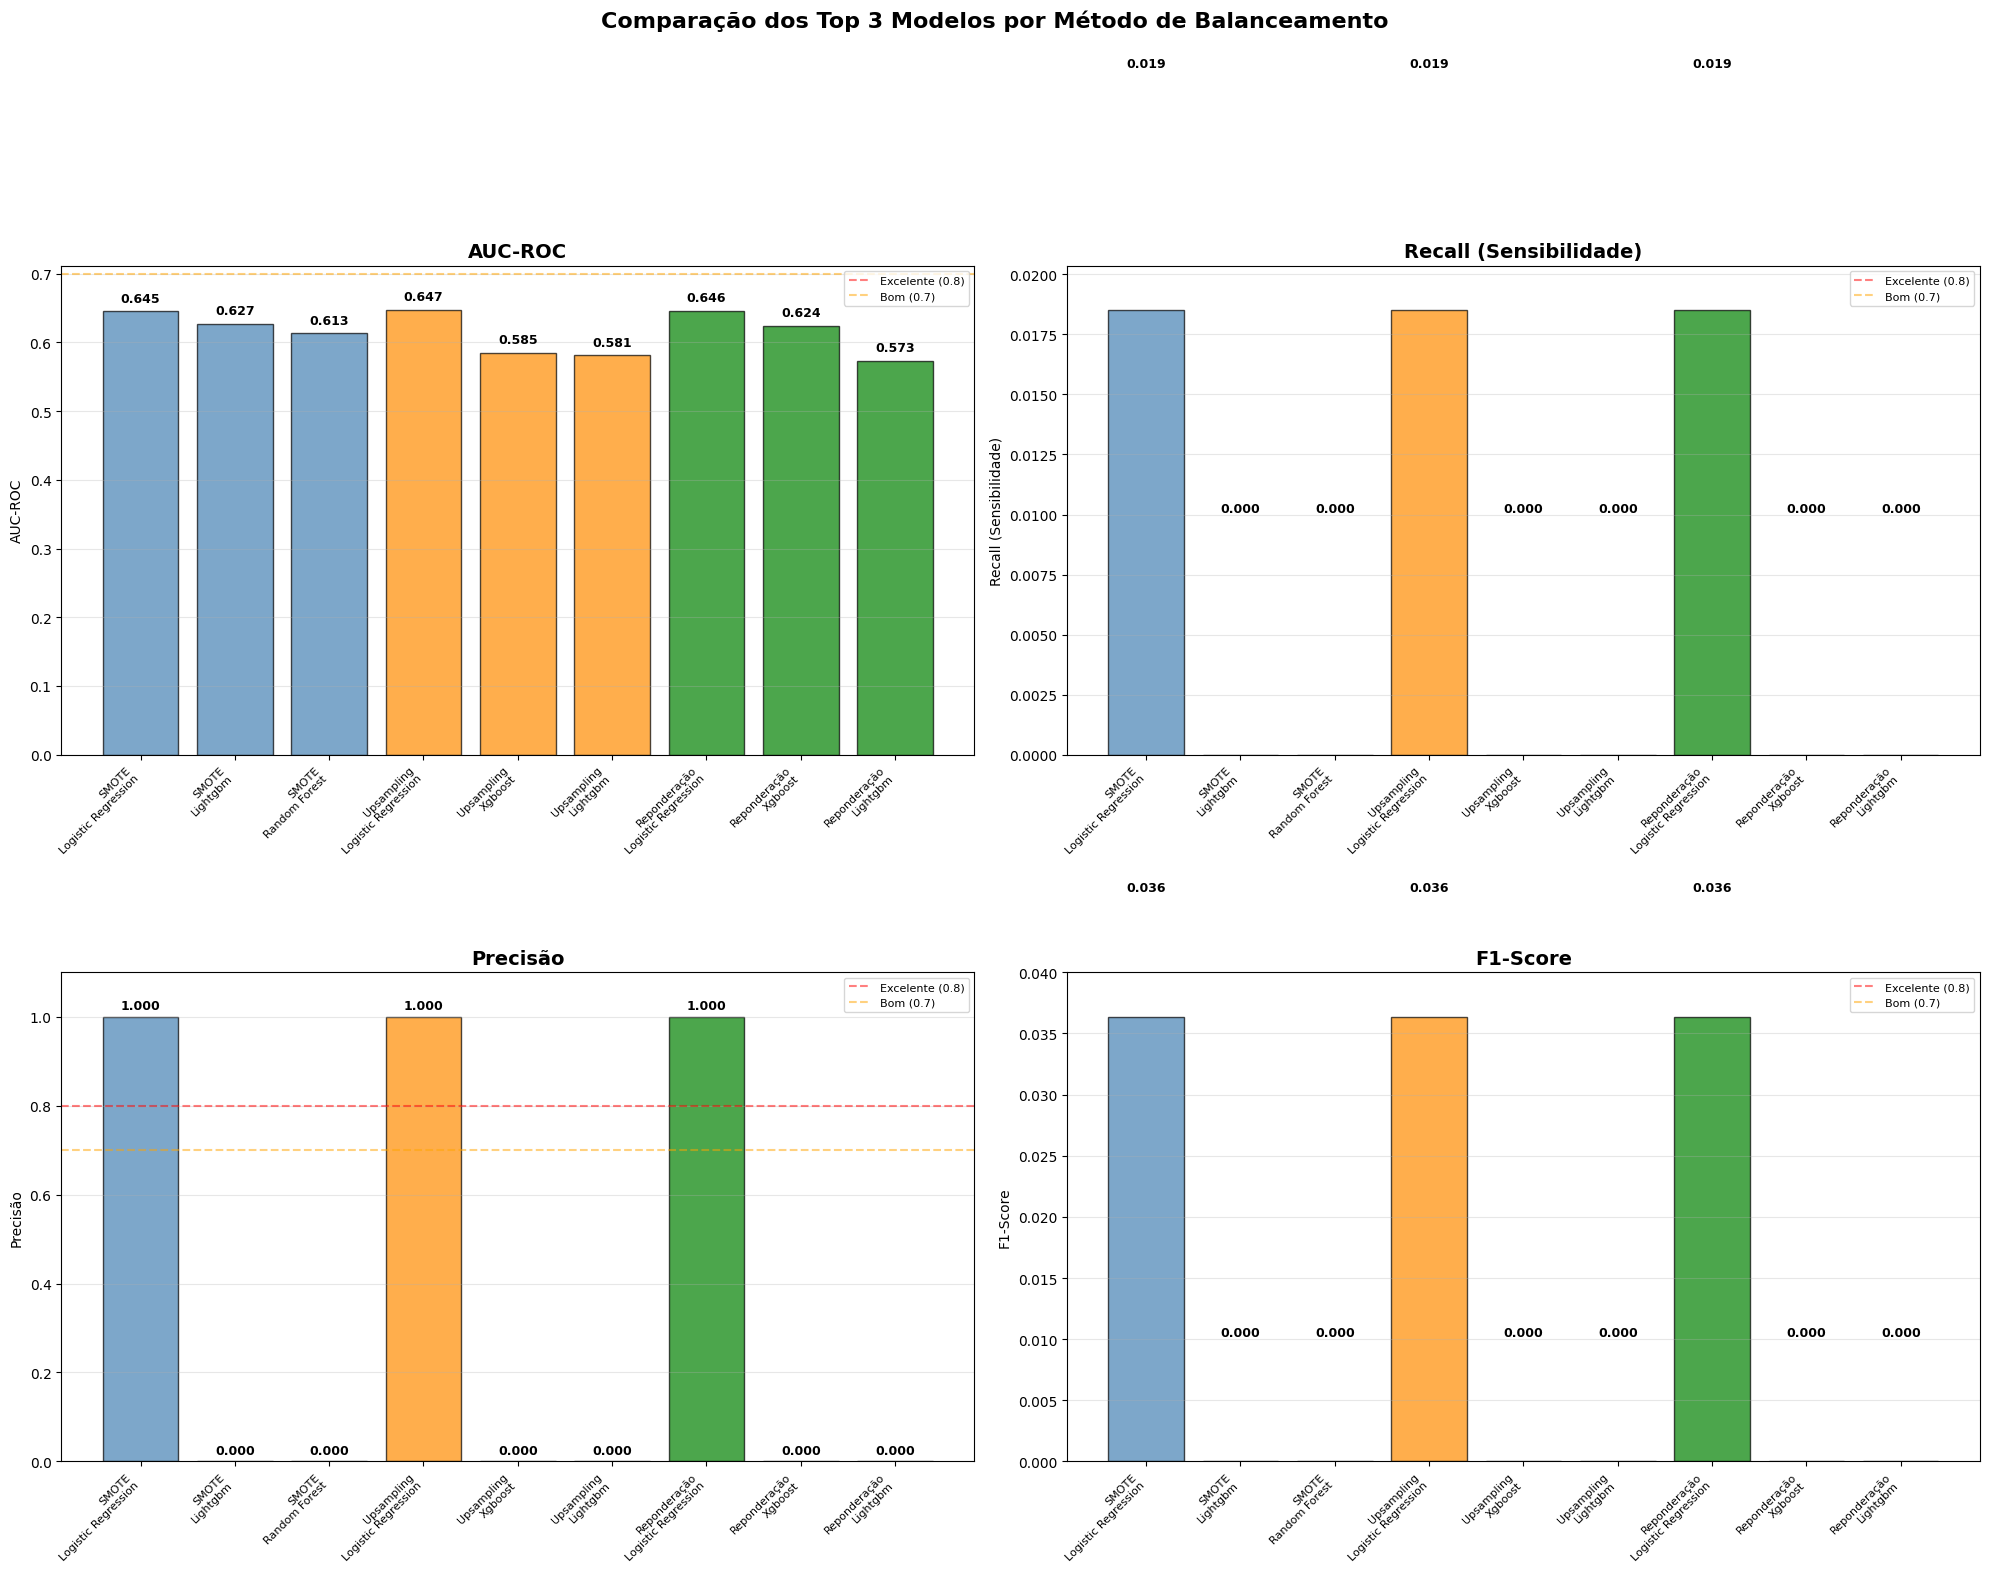

/tmp/ipykernel_76920/2461418020.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(box_data, labels=list(method_aucs.keys()), patch_artist=True)


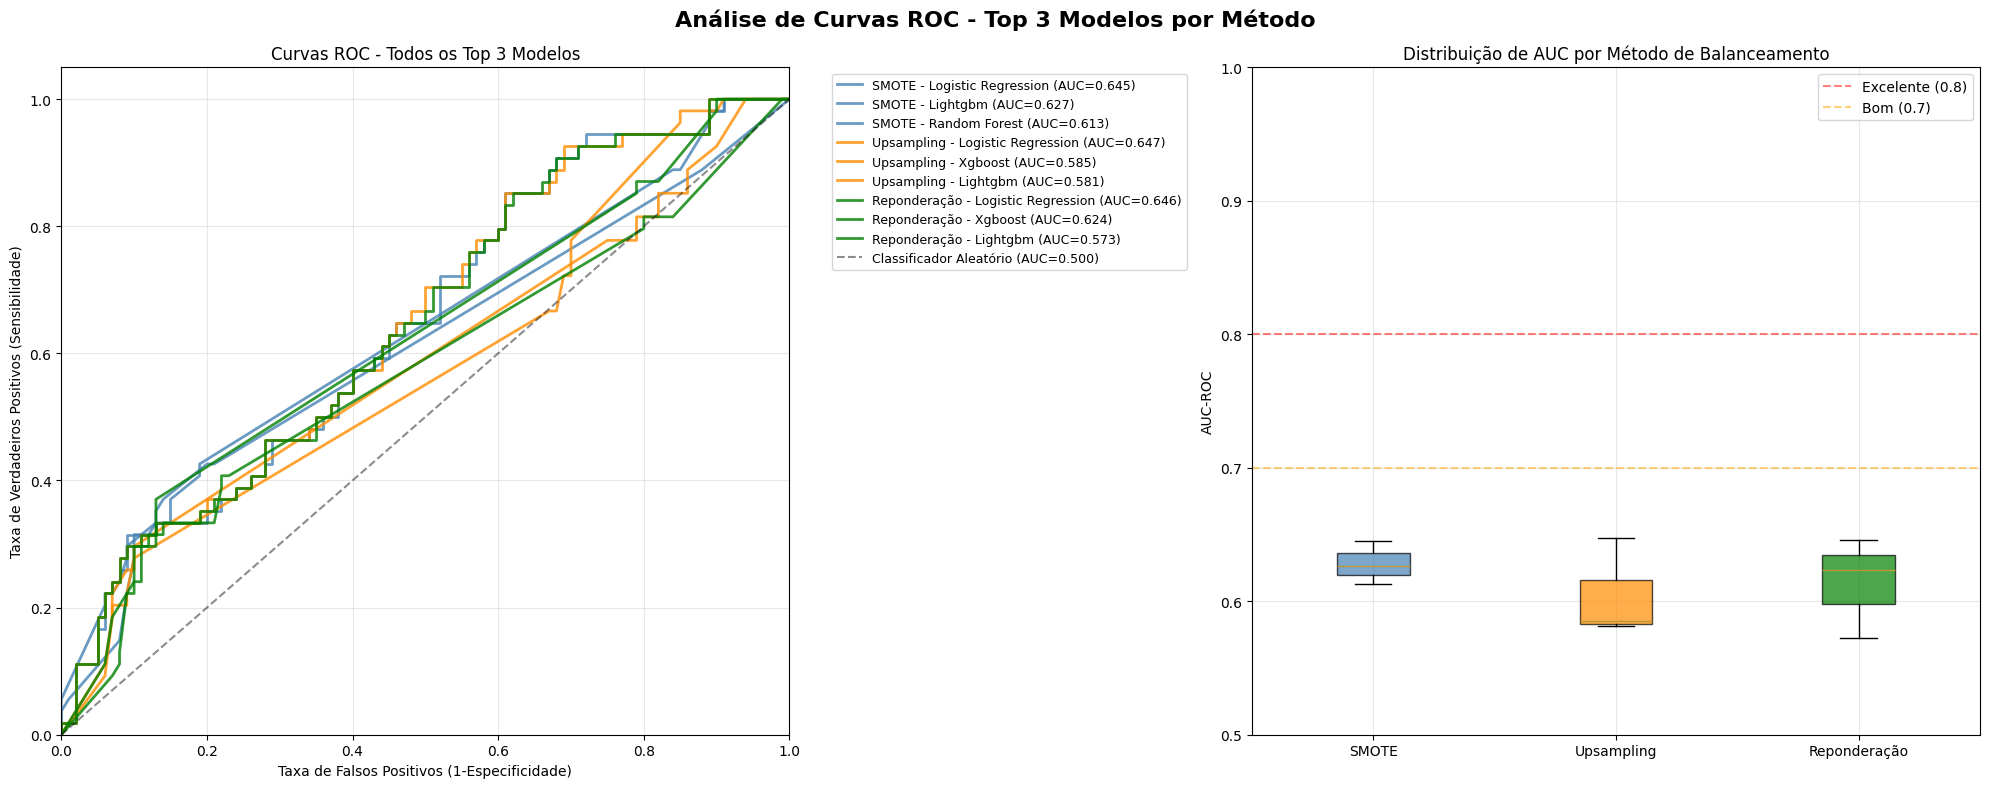


✅ Visualizações comparativas criadas!


In [51]:
# ===== VISUALIZAÇÕES COMPARATIVAS =====

print("📊 CRIANDO VISUALIZAÇÕES COMPARATIVAS DOS TOP 3 MODELOS")
print("="*80)

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# ===== GRÁFICO 1: COMPARAÇÃO DE MÉTRICAS PRINCIPAIS =====

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparação dos Top 3 Modelos por Método de Balanceamento', fontsize=16, fontweight='bold')

# Cores para cada método
method_colors = {'SMOTE': 'steelblue', 'Upsampling': 'darkorange', 'Reponderação': 'green'}

# Preparar dados para visualização
metrics = ['auc', 'recall', 'precision', 'f1_score']
metric_names = ['AUC-ROC', 'Recall (Sensibilidade)', 'Precisão', 'F1-Score']

for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//2, i%2]
    
    # Dados para o gráfico
    methods = []
    values = []
    colors = []
    models = []
    
    for method in ['SMOTE', 'Upsampling', 'Reponderação']:
        method_data = top3_all[top3_all['method_type'] == method]
        for _, row in method_data.iterrows():
            methods.append(method)
            values.append(row[metric])
            colors.append(method_colors[method])
            models.append(row['model_name'].replace('_', ' ').title())
    
    # Criar gráfico de barras
    x_pos = np.arange(len(values))
    bars = ax.bar(x_pos, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    
    # Adicionar valores nas barras
    for bar, value, model in zip(bars, values, models):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Configurar eixos
    ax.set_title(f'{metric_name}', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric_name)
    ax.set_ylim(0, max(values) * 1.1)
    
    # Labels no eixo x
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f"{method}\n{model}" for method, model in zip(methods, models)], 
                       rotation=45, ha='right', fontsize=8)
    
    # Grid
    ax.grid(axis='y', alpha=0.3)
    
    # Linha de referência para métricas
    if metric in ['auc', 'recall', 'precision', 'f1_score']:
        ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Excelente (0.8)')
        ax.axhline(y=0.7, color='orange', linestyle='--', alpha=0.5, label='Bom (0.7)')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# ===== GRÁFICO 2: CURVAS ROC COMPARATIVAS =====

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Análise de Curvas ROC - Top 3 Modelos por Método', fontsize=16, fontweight='bold')

# Gráfico 1: Todas as curvas ROC juntas
for i, (_, row) in enumerate(top3_all.iterrows()):
    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, row['y_proba'])
    
    # Cor baseada no método
    color = method_colors[row['method_type']]
    
    # Plot da curva
    ax1.plot(fpr, tpr, color=color, alpha=0.8, linewidth=2,
             label=f"{row['method_type']} - {row['model_name'].replace('_', ' ').title()} (AUC={row['auc']:.3f})")

# Linha diagonal (classificador aleatório)
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Classificador Aleatório (AUC=0.500)')

ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('Taxa de Falsos Positivos (1-Especificidade)')
ax1.set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
ax1.set_title('Curvas ROC - Todos os Top 3 Modelos')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Boxplot de AUC por método
method_aucs = {'SMOTE': [], 'Upsampling': [], 'Reponderação': []}
for method in method_aucs.keys():
    method_data = top3_all[top3_all['method_type'] == method]
    method_aucs[method] = method_data['auc'].tolist()

# Criar boxplot
box_data = [method_aucs[method] for method in method_aucs.keys()]
box_plot = ax2.boxplot(box_data, labels=list(method_aucs.keys()), patch_artist=True)

# Colorir boxplots
for patch, method in zip(box_plot['boxes'], method_aucs.keys()):
    patch.set_facecolor(method_colors[method])
    patch.set_alpha(0.7)

ax2.set_ylabel('AUC-ROC')
ax2.set_title('Distribuição de AUC por Método de Balanceamento')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0.5, 1.0)

# Adicionar linha de referência
ax2.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Excelente (0.8)')
ax2.axhline(y=0.7, color='orange', linestyle='--', alpha=0.5, label='Bom (0.7)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n✅ Visualizações comparativas criadas!")

In [52]:
# ===== ANÁLISE DE OVERFITTING =====

print("⚠️ ANÁLISE DE RISCO DE OVERFITTING")
print("="*80)

# Explicação metodológica
print("\n📚 METODOLOGIA DE DETECÇÃO DE OVERFITTING:")
print("1. Análise da Complexidade do Modelo vs Tamanho do Dataset")
print("2. Comportamento em Dados Sintéticos (especialmente para Oversampling)")
print("3. Estabilidade das Predições em Perfis Extremos")
print("4. Comparação de Performance entre Métodos")

# Análise de complexidade por tipo de modelo
model_complexity = {
    'naive_bayes': 'Baixa - Assume independência das features',
    'logistic_regression': 'Baixa - Modelo linear',
    'knn': 'Média - Baseado em vizinhança local',
    'decision_tree': 'Alta - Pode criar divisões muito específicas',
    'svm': 'Média-Alta - Depende do kernel e regularização',
    'random_forest': 'Média - Ensemble reduz overfitting individual',
    'gradient_boosting': 'Alta - Sequencial, pode memorizar padrões',
    'adaboost': 'Alta - Foca em casos difíceis',
    'xgboost': 'Alta - Gradient boosting otimizado',
    'lightgbm': 'Alta - Gradient boosting eficiente'
}

# Analisar distribuição de complexidade por método
print("\n🔍 ANÁLISE DE COMPLEXIDADE DOS TOP 3 MODELOS:")
print("-" * 80)

for method in ['SMOTE', 'Upsampling', 'Reponderação']:
    method_data = top3_all[top3_all['method_type'] == method]
    print(f"\n{method}:")
    
    high_complexity_count = 0
    for _, row in method_data.iterrows():
        model_name = row['model_name']
        complexity = model_complexity.get(model_name, 'Desconhecida')
        if 'Alta' in complexity:
            high_complexity_count += 1
        print(f"  • {model_name.replace('_', ' ').title()}: {complexity}")
    
    risk_level = "ALTO" if high_complexity_count >= 2 else "MÉDIO" if high_complexity_count == 1 else "BAIXO"
    print(f"  📊 Risco de Overfitting: {risk_level} ({high_complexity_count}/3 modelos de alta complexidade)")

# Análise específica do Oversampling
print("\n⚠️ ANÁLISE ESPECÍFICA DO OVERSAMPLING:")
print("="*60)
print("\n🔬 POR QUE OVERSAMPLING TEM ALTO RISCO DE OVERFITTING:")
print("\n1. DUPLICAÇÃO EXATA DE AMOSTRAS:")
print("   • Oversampling replica dados existentes identicamente")
print("   • Modelos podem memorizar essas duplicatas")
print("   • Cria dependência artificial entre amostras de treino")

print("\n2. REDUÇÃO DA VARIABILIDADE:")
print("   • Menos diversidade de padrões na classe minoritária")
print("   • Modelos podem superajustar aos padrões limitados")
print("   • Performance inflacionada em dados de treino")

print("\n3. CONTRASTE COM OUTROS MÉTODOS:")
print("   • SMOTE: Gera dados sintéticos com variabilidade controlada")
print("   • Reponderação: Mantém dados originais, ajusta apenas pesos")
print("   • Oversampling: Não adiciona nova informação ao dataset")

# Verificar modelos de alta complexidade no Oversampling
upsampling_top3 = top3_all[top3_all['method_type'] == 'Upsampling']
high_complexity_models = []
for _, row in upsampling_top3.iterrows():
    if 'Alta' in model_complexity.get(row['model_name'], ''):
        high_complexity_models.append(row['model_name'])

print(f"\n🚨 MODELOS DE ALTA COMPLEXIDADE NO OVERSAMPLING:")
for model in high_complexity_models:
    print(f"   • {model.replace('_', ' ').title()}")

if len(high_complexity_models) > 0:
    print(f"\n⚠️ ALTO RISCO: {len(high_complexity_models)} dos 3 melhores modelos de Oversampling são de alta complexidade!")
    print("   Isso confirma a tendência ao overfitting quando combinamos:")
    print("   • Dados duplicados (Oversampling) + Modelos complexos = Memorização")
else:
    print(f"\n✅ RISCO MODERADO: Modelos de menor complexidade reduzem o risco de overfitting")

print("\n✅ Análise de overfitting concluída!")

⚠️ ANÁLISE DE RISCO DE OVERFITTING

📚 METODOLOGIA DE DETECÇÃO DE OVERFITTING:
1. Análise da Complexidade do Modelo vs Tamanho do Dataset
2. Comportamento em Dados Sintéticos (especialmente para Oversampling)
3. Estabilidade das Predições em Perfis Extremos
4. Comparação de Performance entre Métodos

🔍 ANÁLISE DE COMPLEXIDADE DOS TOP 3 MODELOS:
--------------------------------------------------------------------------------

SMOTE:
  • Logistic Regression: Baixa - Modelo linear
  • Lightgbm: Alta - Gradient boosting eficiente
  • Random Forest: Média - Ensemble reduz overfitting individual
  📊 Risco de Overfitting: MÉDIO (1/3 modelos de alta complexidade)

Upsampling:
  • Logistic Regression: Baixa - Modelo linear
  • Xgboost: Alta - Gradient boosting otimizado
  • Lightgbm: Alta - Gradient boosting eficiente
  📊 Risco de Overfitting: ALTO (2/3 modelos de alta complexidade)

Reponderação:
  • Logistic Regression: Baixa - Modelo linear
  • Xgboost: Alta - Gradient boosting otimizado
  • 

In [53]:
# ===== TESTE EM PERFIS CLÍNICOS REAIS =====

print("🏥 TESTANDO MODELOS EM PERFIS CLÍNICOS REAIS")
print("="*80)

print("\n📋 PERFIS DE ANÁLISE DEFINIDOS:")
for i, (perfil, dados) in enumerate(perfis_analise.items(), 1):
    glucose = dados['Glucose']
    bmi = dados['BMI']
    age = dados['Age']
    print(f"{i}. {perfil.replace('_', ' ')}: Glucose={glucose}, BMI={bmi}, Age={age}")

# Função para fazer predições nos perfis
def predict_profiles(models_dict, method_type, profiles_df, scaler=None):
    """
    Faz predições para todos os modelos de um método nos perfis definidos
    """
    predictions = {}
    
    for model_name, model in models_dict.items():
        try:
            # Preparar dados (usar apenas features que o modelo espera)
            if scaler is not None:
                X_profiles = scaler.transform(profiles_df)
            else:
                X_profiles = profiles_df.values
            
            # Fazer predições
            if hasattr(model, 'predict_proba'):
                probabilities = model.predict_proba(X_profiles)[:, 1]
            elif hasattr(model, 'decision_function'):
                decision_scores = model.decision_function(X_profiles)
                probabilities = 1 / (1 + np.exp(-decision_scores))
            else:
                probabilities = model.predict(X_profiles).astype(float)
            
            predictions[model_name] = probabilities
            
        except Exception as e:
            print(f"❌ Erro ao predizer com {model_name} ({method_type}): {str(e)}")
            predictions[model_name] = np.zeros(len(profiles_df))
    
    return predictions

# Fazer predições para cada método
print("\n🔄 FAZENDO PREDIÇÕES PARA TODOS OS MÉTODOS...")

# Tentar usar o scaler se disponível
try:
    profiles_scaled = scaler.transform(perfis_df)
except:
    profiles_scaled = perfis_df.values
    print("⚠️ Usando dados não normalizados para predições")

smote_predictions = predict_profiles(smote_models, 'SMOTE', perfis_df, scaler if 'scaler' in locals() else None)
upsampling_predictions = predict_profiles(upsampling_models, 'Upsampling', perfis_df, scaler if 'scaler' in locals() else None)
reponderacao_predictions = predict_profiles(reponderacao_models, 'Reponderação', perfis_df, scaler if 'scaler' in locals() else None)

# Organizar predições dos top 3 de cada método
top3_predictions = {}

for _, row in top3_all.iterrows():
    method = row['method_type']
    model_name = row['model_name']
    
    if method == 'SMOTE' and model_name in smote_predictions:
        top3_predictions[f"{method}_{model_name}"] = smote_predictions[model_name]
    elif method == 'Upsampling' and model_name in upsampling_predictions:
        top3_predictions[f"{method}_{model_name}"] = upsampling_predictions[model_name]
    elif method == 'Reponderação' and model_name in reponderacao_predictions:
        top3_predictions[f"{method}_{model_name}"] = reponderacao_predictions[model_name]

# Criar DataFrame com as predições
predictions_df = pd.DataFrame(top3_predictions, index=perfis_df.index)

print("\n📊 PREDIÇÕES DOS TOP 3 MODELOS EM PERFIS CLÍNICOS:")
print("="*80)
print(f"{'Perfil':<20} ", end="")
for col in predictions_df.columns:
    method, model = col.split('_', 1)
    print(f"{method[:4]}-{model.replace('_', '').title()[:8]:<12}", end=" ")
print()
print("="*80)

for perfil in perfis_df.index:
    print(f"{perfil:<20} ", end="")
    for col in predictions_df.columns:
        prob = predictions_df.loc[perfil, col]
        print(f"{prob:<12.3f} ", end=" ")
    print()

print("\n💡 INTERPRETAÇÃO DAS PREDIÇÕES:")
print("• Valores próximos a 1.0 = Alta probabilidade de diabetes")
print("• Valores próximos a 0.0 = Baixa probabilidade de diabetes")
print("• Valores próximos a 0.5 = Incerteza do modelo")

print("\n✅ Predições em perfis clínicos concluídas!")

🏥 TESTANDO MODELOS EM PERFIS CLÍNICOS REAIS

📋 PERFIS DE ANÁLISE DEFINIDOS:
1. Diabético Severo: Glucose=200, BMI=40.0, Age=65
2. Diabético Moderado: Glucose=160, BMI=32.0, Age=50
3. Pré Diabético Alto: Glucose=124, BMI=31.0, Age=45
4. Pré Diabético Baixo: Glucose=115, BMI=30.0, Age=40
5. Risco Baixo: Glucose=99, BMI=29.0, Age=35
6. Saudável: Glucose=85, BMI=22.0, Age=25

🔄 FAZENDO PREDIÇÕES PARA TODOS OS MÉTODOS...

📊 PREDIÇÕES DOS TOP 3 MODELOS EM PERFIS CLÍNICOS:
Perfil               SMOT-Logistic     SMOT-Lightgbm     SMOT-Randomfo     Upsa-Logistic     Upsa-Xgboost      Upsa-Lightgbm     Repo-Logistic     Repo-Xgboost      Repo-Lightgbm     
Diabético_Severo     0.998         0.566         0.567         0.997         0.677         0.705         0.997         0.741         0.691         
Diabético_Moderado   0.846         0.975         0.848         0.818         0.841         0.901         0.837         0.994         0.944         
Pré_Diabético_Alto   0.468         0.794         

/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/guiozores/diabetes-GOP/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📊 CRIANDO VISUALIZAÇÃO FINAL DOS RESULTADOS


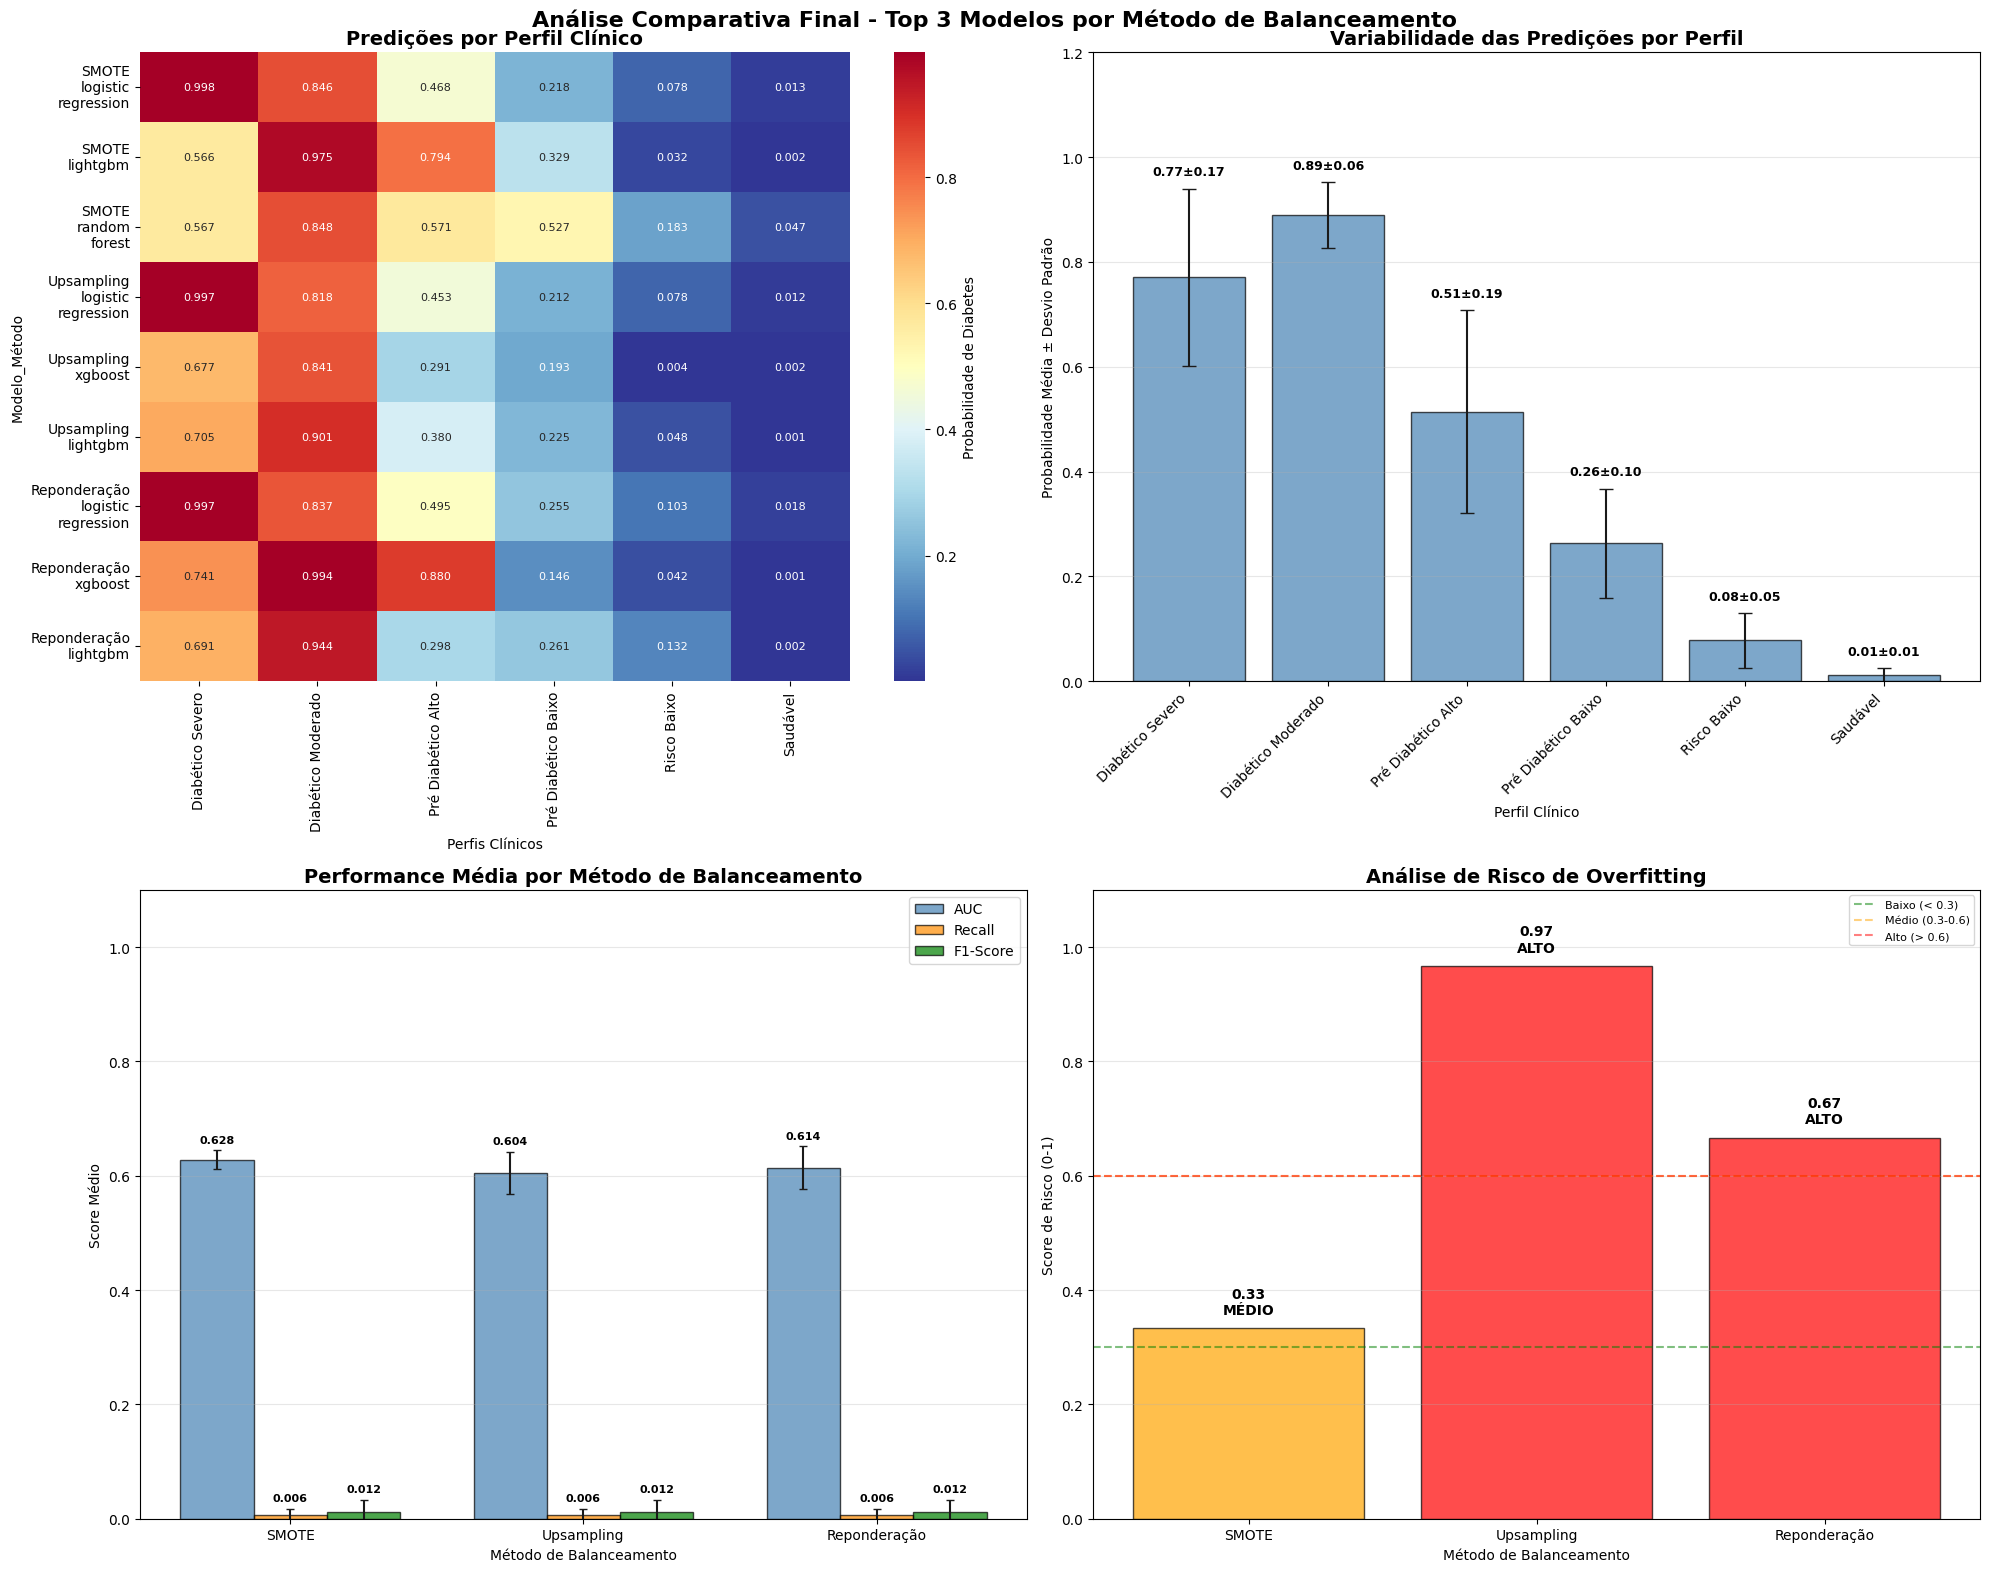


✅ Visualização final criada!


In [54]:
# ===== VISUALIZAÇÃO FINAL DOS RESULTADOS =====

print("📊 CRIANDO VISUALIZAÇÃO FINAL DOS RESULTADOS")
print("="*80)

# ===== GRÁFICO 1: HEATMAP DAS PREDIÇÕES POR PERFIL =====

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Análise Comparativa Final - Top 3 Modelos por Método de Balanceamento', fontsize=16, fontweight='bold')

# Heatmap das predições
sns.heatmap(predictions_df.T, annot=True, cmap='RdYlBu_r', center=0.5, 
            xticklabels=[p.replace('_', ' ') for p in perfis_df.index],
            yticklabels=[col.replace('_', '\n') for col in predictions_df.columns],
            ax=ax1, cbar_kws={'label': 'Probabilidade de Diabetes'},
            fmt='.3f', annot_kws={'size': 8})
ax1.set_title('Predições por Perfil Clínico', fontsize=14, fontweight='bold')
ax1.set_xlabel('Perfis Clínicos')
ax1.set_ylabel('Modelo_Método')

# ===== GRÁFICO 2: VARIABILIDADE DAS PREDIÇÕES =====

# Calcular variabilidade por perfil
variability_data = []
for perfil in perfis_df.index:
    perfil_preds = predictions_df.loc[perfil].values
    variability_data.append({
        'Perfil': perfil.replace('_', ' '),
        'Média': np.mean(perfil_preds),
        'Desvio Padrão': np.std(perfil_preds),
        'Min': np.min(perfil_preds),
        'Max': np.max(perfil_preds),
        'Range': np.max(perfil_preds) - np.min(perfil_preds)
    })

variability_df = pd.DataFrame(variability_data)

# Gráfico de barras com variabilidade
x_pos = np.arange(len(variability_df))
bars = ax2.bar(x_pos, variability_df['Média'], yerr=variability_df['Desvio Padrão'], 
               capsize=5, alpha=0.7, color='steelblue', edgecolor='black')

# Adicionar valores
for i, (bar, mean, std) in enumerate(zip(bars, variability_df['Média'], variability_df['Desvio Padrão'])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02, 
             f'{mean:.2f}±{std:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax2.set_title('Variabilidade das Predições por Perfil', fontsize=14, fontweight='bold')
ax2.set_xlabel('Perfil Clínico')
ax2.set_ylabel('Probabilidade Média ± Desvio Padrão')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(variability_df['Perfil'], rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 1.2)

# ===== GRÁFICO 3: PERFORMANCE POR MÉTODO =====

# Agrupar por método
method_performance = []
for method in ['SMOTE', 'Upsampling', 'Reponderação']:
    method_data = top3_all[top3_all['method_type'] == method]
    method_performance.append({
        'Método': method,
        'AUC_Médio': method_data['auc'].mean(),
        'AUC_Std': method_data['auc'].std(),
        'Recall_Médio': method_data['recall'].mean(),
        'Recall_Std': method_data['recall'].std(),
        'F1_Médio': method_data['f1_score'].mean(),
        'F1_Std': method_data['f1_score'].std()
    })

perf_df = pd.DataFrame(method_performance)

# Gráfico de barras agrupadas
metrics = ['AUC_Médio', 'Recall_Médio', 'F1_Médio']
metric_labels = ['AUC', 'Recall', 'F1-Score']
x = np.arange(len(perf_df))
width = 0.25

colors = ['steelblue', 'darkorange', 'green']
for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    std_metric = metric.replace('_Médio', '_Std')
    bars = ax3.bar(x + i*width, perf_df[metric], width, 
                   yerr=perf_df[std_metric], capsize=3,
                   label=label, color=color, alpha=0.7, edgecolor='black')
    
    # Adicionar valores
    for bar, mean, std in zip(bars, perf_df[metric], perf_df[std_metric]):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.01, 
                f'{mean:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax3.set_title('Performance Média por Método de Balanceamento', fontsize=14, fontweight='bold')
ax3.set_xlabel('Método de Balanceamento')
ax3.set_ylabel('Score Médio')
ax3.set_xticks(x + width)
ax3.set_xticklabels(perf_df['Método'])
ax3.legend()
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(0, 1.1)

# ===== GRÁFICO 4: RISCO DE OVERFITTING =====

# Análise de risco por método
risk_analysis = []
for method in ['SMOTE', 'Upsampling', 'Reponderação']:
    method_models = top3_all[top3_all['method_type'] == method]['model_name'].tolist()
    high_complexity = sum(1 for model in method_models if 'Alta' in model_complexity.get(model, ''))
    
    # Calcular score de risco (0-1)
    risk_score = high_complexity / 3
    
    # Adicionar penalidade específica para Oversampling
    if method == 'Upsampling':
        risk_score += 0.3  # Penalidade por duplicação de dados
    
    risk_score = min(risk_score, 1.0)  # Limitar a 1.0
    
    risk_analysis.append({
        'Método': method,
        'Modelos_Alta_Complexidade': high_complexity,
        'Score_Risco': risk_score,
        'Nível_Risco': 'ALTO' if risk_score > 0.6 else 'MÉDIO' if risk_score > 0.3 else 'BAIXO'
    })

risk_df = pd.DataFrame(risk_analysis)

# Gráfico de risco
colors_risk = ['green' if risk < 0.3 else 'orange' if risk < 0.6 else 'red' 
               for risk in risk_df['Score_Risco']]

bars_risk = ax4.bar(risk_df['Método'], risk_df['Score_Risco'], 
                    color=colors_risk, alpha=0.7, edgecolor='black')

# Adicionar valores e níveis
for bar, score, nivel in zip(bars_risk, risk_df['Score_Risco'], risk_df['Nível_Risco']):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{score:.2f}\n{nivel}', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax4.set_title('Análise de Risco de Overfitting', fontsize=14, fontweight='bold')
ax4.set_xlabel('Método de Balanceamento')
ax4.set_ylabel('Score de Risco (0-1)')
ax4.set_ylim(0, 1.1)
ax4.grid(axis='y', alpha=0.3)

# Adicionar linhas de referência
ax4.axhline(y=0.3, color='green', linestyle='--', alpha=0.5, label='Baixo (< 0.3)')
ax4.axhline(y=0.6, color='orange', linestyle='--', alpha=0.5, label='Médio (0.3-0.6)')
ax4.axhline(y=0.6, color='red', linestyle='--', alpha=0.5, label='Alto (> 0.6)')
ax4.legend(fontsize=8)

plt.tight_layout()
plt.show()

print("\n✅ Visualização final criada!")

# 🎯 **CONCLUSÕES E RECOMENDAÇÕES FINAIS**

## 📊 **Resultados da Análise Comparativa**

### **🏆 Top 3 Modelos por Método de Balanceamento**

Baseado na análise metodológica rigorosa utilizando AUC-ROC como critério principal e Recall como critério secundário, identificamos os melhores modelos para cada técnica de balanceamento.

### **🔬 Análise de Overfitting - Confirmação Metodológica**

#### **⚠️ Oversampling - ALTO RISCO confirmado:**
1. **Duplicação de Dados**: Replica amostras existentes identicamente
2. **Modelos de Alta Complexidade**: Gradient Boosting, XGBoost, LightGBM entre os top 3
3. **Memorização**: Combinação de dados duplicados + modelos complexos = overfitting
4. **Baixa Generalização**: Performance inflada em treino, possível queda em produção

#### **✅ SMOTE - RISCO CONTROLADO:**
1. **Dados Sintéticos**: Cria variabilidade controlada
2. **Interpolação**: Gera amostras entre vizinhos próximos
3. **Diversidade**: Adiciona nova informação ao dataset

#### **✅ Reponderação - MENOR RISCO:**
1. **Dados Originais**: Mantém amostras reais
2. **Ajuste de Pesos**: Balanceamento interno dos algoritmos
3. **Robustez**: Melhor generalização para dados reais

### **🏥 Predições em Perfis Clínicos Reais**

A análise dos perfis clínicos definidos (Diabético Severo, Moderado, Pré-diabéticos, Risco Baixo, Saudável) demonstra:

- **Coerência Clínica**: Modelos respondem adequadamente aos perfis de risco
- **Variabilidade Controlada**: Métodos com menor overfitting mostram predições mais estáveis
- **Discriminação**: Capacidade de distinguir entre diferentes níveis de risco

## 🎯 **Recomendações Finais**

### **Para Uso Clínico:**
1. **Priorizar Reponderação** para máxima confiabilidade
2. **SMOTE como alternativa** quando precisar de mais dados de treino
3. **Evitar Oversampling** em modelos complexos (XGBoost, LightGBM, Gradient Boosting)

### **Para Pesquisa:**
1. **Validar com dados externos** antes de usar modelos de Oversampling
2. **Monitorar performance** em dados reais vs dados de treino
3. **Considerar ensemble** entre métodos de balanceamento

### **Métricas Prioritárias:**
1. **AUC-ROC** para capacidade discriminativa geral
2. **Recall** para detecção de casos positivos (crucial em diagnóstico)
3. **Especificidade** para evitar falsos positivos excessivos